# Colore

In [5]:
import math
from sklearn.neighbors import KNeighborsClassifier
import keras
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KDTree
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import cv2
import numpy as np
from matplotlib import pyplot as plt
import operator

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import operator

def get_colors (image_path):
    img = cv2.imread(image_path)
    _, img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

    color = ('b','g','r')
    qtdBlue = 0
    qtdGreen = 0
    qtdRed = 0
    totalPixels = 0

    for channel,col in enumerate(color):
        histr = cv2.calcHist([img],[channel],None,[256],[1,256])
        totalPixels+=sum(histr)
        if channel==0:
            qtdBlue = sum(histr)
        elif channel==1:
            qtdGreen = sum(histr)
        elif channel==2:
            qtdRed = sum(histr)

    qtdBlue = (qtdBlue/totalPixels)*100
    qtdGreen = (qtdGreen/totalPixels)*100
    qtdRed = (qtdRed/totalPixels)*100

    if math.isnan(qtdBlue) == True :
        qtdBlue = np.zeros(1)
    if math.isnan(qtdGreen) == True :
        qtdGreen = np.zeros(1)
    if math.isnan(qtdRed) == True :
        qtdRed = np.zeros(1)

    colors = np.asarray([qtdBlue[0], qtdGreen[0], qtdRed[0]])
    #colors = np.expand_dims(colors, axis = 0)
    return colors

In [7]:
get_colors('mask_train/image_02916.jpg')

array([0., 0., 0.])

# SURF

! pip install opencv_contrib_python==3.4.2.17 --force-reinstall

In [95]:
import cv2

In [96]:
import cv2
print(cv2.__version__) 

3.4.2


In [97]:
def extract_keypoins (image_path):
    
    image = cv2.imread(image_path, 0)
    surf = cv2.xfeatures2d.SURF_create()
    _, features = surf.detectAndCompute(image, None)

    max_items = 300

    if features is not None:

        if len(features) < max_items:
            shape = (max_items, 64)
            features_pad = np.zeros(shape)
            features_pad[:features.shape[0],:features.shape[1]] = features
            features_crop = features_pad[:max_items]
        else:
            features_crop = features[:max_items]
    else:
        features_crop = np.zeros (max_items*64)
    features_final = features_crop.reshape(max_items*64)

    return features_final

In [98]:
def extract_keypoins_edges (image_path):
    
    image = cv2.imread(image_path, 0)
    edges = cv2.Canny(image, 500, 100)
    surf = cv2.xfeatures2d.SURF_create(1000)
    _, features = surf.detectAndCompute(edges, None)

    max_items = 300

    if features is not None:
        
        if len(features) < max_items:
            shape = (max_items, 64)
            features_pad = np.zeros(shape)
            features_pad[:features.shape[0],:features.shape[1]] = features
            features_crop = features_pad[:max_items]
        else:
            features_crop = features[:max_items]
    else:
        features_crop = np.zeros (max_items*64)
    
    features_final = features_crop.reshape(max_items*64)

    return features_final

bf = cv2.BFMatcher(crossCheck=True)

#features = def 
list_best_images =[]
list_best_images_top =[]
diz_features = {}
for image in os.listdir('mask_categories'):
    print (image)
    image_path = 'mask_categories/'+image

    image2 = cv2.imread(image_path, 0)
    edges = cv2.Canny(image2, 500, 100)
    surf = cv2.xfeatures2d.SURF_create()
    _, features2 = surf.detectAndCompute(edges, None)
    diz_features[image] = features2.flatten()



image_path = '102flowers/image_05543.jpg'
image = cv2.imread(image_path, 0)
edges = cv2.Canny(image, 10, 200)
surf = cv2.xfeatures2d.SURF_create()
kps, features = surf.detectAndCompute(edges, None)
box_kps=cv2.drawKeypoints(image, kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(edges)

image_path = 'mask_tot/image_05543.jpg'
image = cv2.imread(image_path, 0)
edges = cv2.Canny(image, 100, 800)
surf = cv2.xfeatures2d.SURF_create()
kps, features = surf.detectAndCompute(edges, None)
box_kps=cv2.drawKeypoints(image, kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(edges)

image_path = 'mask_categories/043.jpg'
image2 = cv2.imread(image_path, 0)
edges = cv2.Canny(image2, 500, 100)
surf = cv2.xfeatures2d.SURF_create()
kps2, features2 = surf.detectAndCompute(edges, None)
box_kps2=cv2.drawKeypoints(image2, kps2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(box_kps2)

cosine_similarity(features.flatten(), features2.flatten())

bf = cv2.BFMatcher(crossCheck=True)
matches = bf.match(features,features2 )
matches = sorted(matches, key=lambda x: x.distance)
print(len(matches))
result = cv2.drawMatches(image, kps, image2, kps2, matches[:10], None, matchColor=[255,255,0]) #[255,255,0] = giallo
plt.imshow(result)

In [99]:
print(matches[0].distance)
print(matches[len(matches)-1].distance)

NameError: name 'matches' is not defined

image_path = 'mask_categories/077.jpg'
image3 = cv2.imread(image_path, 0)
#edges = cv2.Canny(image, 500, 100)
surf = cv2.xfeatures2d.SIFT_create(nfeatures=150)
kps3, features3 = surf.detectAndCompute(image3, None)
box_kps3=cv2.drawKeypoints(image3, kps3, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(box_kps3)

len(features3)

bf = cv2.BFMatcher(crossCheck=True)
matches0 = bf.match(features, features3)
matches = sorted(matches, key=lambda x: x.distance)
result = cv2.drawMatches(image, kps, image3, kps3, matches[:20], None, matchColor=[255,255,0]) #[255,255,0] = giallo
plt.imshow(result)

matches.distance

len(matches)

image_path = 'mask_tot/image_07995.jpg'
image = cv2.imread(image_path, 0)
#edges = cv2.Canny(image, 500, 100)
surf = cv2.xfeatures2d.SURF_create(1000)
kps2, features2 = surf.detectAndCompute(image, None)
box_kps=cv2.drawKeypoints(image, kps2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(box_kps)

print (cosine_similarity(features.flatten(), features2.flatten()))

# Neural Features

In [9]:
import os
import numpy as np
from keras.preprocessing import image as kimage
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [124]:
net = mobilenet_v2.MobileNetV2(include_top=False, weights='imagenet', pooling='avg', input_shape=(224,224,3))

In [125]:
net.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [12]:
netvgg = VGG16(weights='imagenet')

In [13]:
feature_extractor2 = Model(inputs = netvgg.inputs, outputs = netvgg.get_layer('block3_pool').output)

In [14]:
feature_extractor3 = Model(inputs = netvgg.inputs, outputs = netvgg.get_layer('fc1').output)

In [126]:
def neural_features(image_path):
    img = kimage.load_img(image_path, target_size=(224, 224))
    x = kimage.img_to_array(img)
    x = mobilenet_v2.preprocess_input(x)
    x = np.expand_dims(x, axis = 0)
    features = net.predict(x) #features = feature_extractor1.predict(x) feature_extractor2.predict(x) net.predict(x) netvgg.predict(x) feature_extractor3.predict(x)
    features = features.flatten()   
    return features


# LBP

In [ ]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
   
      
def get_pixel(img, center, x, y): 
      
    new_value = 0
      
    try: 
        # If local neighbourhood pixel  
        # value is greater than or equal 
        # to center pixel values then  
        # set it to 1 
        if img[x][y] >= center: 
            new_value = 1
              
    except: 
        # Exception is required when  
        # neighbourhood value of a center 
        # pixel value is null i.e. values 
        # present at boundaries. 
        pass
      
    return new_value 

In [29]:

# Function for calculating LBP 
def lbp_calculated_pixel(img, x, y): 
   
    center = img[x][y] 
   
    val_ar = [] 
      
    # top_left 
    val_ar.append(get_pixel(img, center, x-1, y-1)) 
      
    # top 
    val_ar.append(get_pixel(img, center, x-1, y)) 
      
    # top_right 
    val_ar.append(get_pixel(img, center, x-1, y + 1)) 
      
    # right 
    val_ar.append(get_pixel(img, center, x, y + 1)) 
      
    # bottom_right 
    val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
      
    # bottom 
    val_ar.append(get_pixel(img, center, x + 1, y)) 
      
    # bottom_left 
    val_ar.append(get_pixel(img, center, x + 1, y-1)) 
      
    # left 
    val_ar.append(get_pixel(img, center, x, y-1)) 

    #from binary to int

    val = int(''.join(str(e) for e in val_ar), 2)

    return val 

In [67]:
def lbp_image (image_path):

    img_bgr = cv2.imread(image_path, 1) 
    img_bgr = cv2.resize(img_bgr, (224,224))
    
    height, width, _ = img_bgr.shape 
    
    # We need to convert RGB image  
    # into gray one because gray  
    # image has one channel only. 
    img_gray = cv2.cvtColor(img_bgr, 
                            cv2.COLOR_BGR2GRAY) 
    
    # Create a numpy array as  
    # the same height and width  
    # of RGB image 
    img_lbp = np.zeros((height, width), 
                    np.uint8) 
    
    for i in range(0, height): 
        for j in range(0, width): 
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    
    img_array = img_lbp.flatten()
    
    return img_array

In [51]:
base_net = mobilenet_v2.MobileNetV2(include_top=False, weights='imagenet', pooling='avg', input_shape=(224,224,3))
base_net.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

# HOG

In [20]:
!pip install scikit-image

You should consider upgrading via the 'c:\users\teresa\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [85]:
from skimage.feature import hog
def hog_image (image_path):
    image = kimage.load_img(image_path, target_size= (224,224))
    features, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

    return features


In [90]:
hog_image('mask_NEW/image_00001.jpg').shape

(1568,)

In [91]:
get_colors('mask_NEW/image_00001.jpg').shape

(3,)

# Combine features

In [16]:
def combo_colors_kps_neural(image_path):

  colors = get_colors(image_path)
  #print(colors.shape)

  kps = extract_keypoins_edges(image_path)
  #print(kps.shape)

  neural = neural_features (image_path)
  #print(neural.shape)

  return np.concatenate((colors, kps, neural))

In [93]:
def combo_colors_kps(image_path):

    colors = get_colors(image_path)
    
    kps = extract_keypoins_edges(image_path)
    
    return np.concatenate((colors, kps))

In [94]:
def combo_colors_neural(image_path):

    colors = get_colors(image_path)
    
    neural = neural_features (image_path)
    
    return np.concatenate((colors, neural))

In [68]:
def combo_colors_lbp(image_path):

    colors = get_colors(image_path)
    
    lbp = lbp_image (image_path)
    
    return np.concatenate((colors, lbp))

In [13]:
def combo_colors_hog(image_path):

    colors = get_colors(image_path)
    
    hog = hog_image (image_path)
    
    return np.concatenate((colors, hog))

In [127]:
def combo_neural_colors_hog(image_path):

    neural = neural_features (image_path)

    colors = get_colors(image_path)
    
    hog = hog_image (image_path)
    
    return np.concatenate((colors, neural, hog))

# Load Data

In [109]:
# Debug variable to limit the number of loaded images
#maximages = 1022

# Dummy feature
def identity(image_path):
    img = kimage.load_img(image_path, target_size=(224, 224), color_mode= 'rgb')
    x = kimage.img_to_array(img)
    x = mobilenet_v2.preprocess_input(x)
    return x

# Data loader
def load_data(folder, feature_extractor=identity, maximages = 'default' ):
    if maximages == 'default':
        maximages = len(os.listdir(folder))+1

    base_path = folder

    features = []

    for index, image in enumerate(sorted(os.listdir(base_path))):
        print ('image', index)
        if index < maximages:
            image_path = base_path+image
            # Load file and extract features
            cur_features = feature_extractor(image_path)
            #cur_features = cur_features.flatten()
            features.append(cur_features)

    #features = np.array(features)
    return features

In [128]:
X_train_features = load_data('mask_NEW_train/',feature_extractor=combo_neural_colors_hog)
with open('X_train_features_neural_colors_hog.pickle', 'wb') as handle:
    pickle.dump(X_train_features, handle)

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [114]:
import pickle
with open ('102flowers_y_train.pickle', 'rb') as handle:
    y_train = pickle.load(handle)
num_classes = 102
yc_train = keras.utils.to_categorical(y_train-1, num_classes)

In [129]:
X_test_features = load_data(feature_extractor=combo_neural_colors_hog, folder = 'mask_NEW_test/')
with open('X_test_features_neural_colors_hog.pickle', 'wb') as handle:
    pickle.dump(X_test_features, handle)

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [116]:
with open ('102flowers_y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)
num_classes = 102
yc_test = keras.utils.to_categorical(y_test-1, num_classes)

In [130]:
X_val_features = load_data(feature_extractor=combo_neural_colors_hog, folder = 'mask_NEW_val/')
with open('X_val_features_neural_colors_hog.pickle', 'wb') as handle:
    pickle.dump(X_val_features, handle)

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [118]:
with open ('102flowers_y_val.pickle', 'rb') as handle:
    y_val = pickle.load(handle)
num_classes = 102
yc_val = keras.utils.to_categorical(y_val-1, num_classes)

# Prova classificatore

In [113]:
classifier = KNeighborsClassifier(n_neighbors=4)
history = classifier.fit(X_train_features, np.argmax(yc_train, axis=1))

In [42]:
with open('knn4_neural_mobilenet_SUTEST.pickle', 'wb') as handle:
    pickle.dump(history, handle)

In [43]:
y_pred_test = classifier.predict(X_test_features)
confusion_matrix2_test = confusion_matrix(np.argmax(yc_test, axis=1),y_pred_test)
classification_report2_test = classification_report(np.argmax(yc_test, axis=1),y_pred_test)
classification_report_DICT_test = classification_report(np.argmax(yc_test, axis=1),y_pred_test, output_dict=True)
accuracy_test = classification_report_DICT_test['accuracy']
print(classification_report2_test)

              precision    recall  f1-score   support

           0       0.57      0.85      0.68        20
           1       0.97      0.97      0.97        40
           2       0.45      0.70      0.55        20
           3       0.56      0.61      0.59        36
           4       0.82      0.93      0.87        45
           5       0.96      0.96      0.96        25
           6       0.78      0.70      0.74        20
           7       0.90      1.00      0.95        65
           8       0.80      0.77      0.78        26
           9       1.00      1.00      1.00        25
          10       0.68      0.85      0.75        67
          11       0.97      0.96      0.96        67
          12       1.00      0.97      0.98        29
          13       0.79      0.93      0.85        28
          14       0.83      1.00      0.91        29
          15       1.00      0.81      0.89        21
          16       0.95      0.94      0.95        65
          17       0.70    

In [44]:
y_pred_train = classifier.predict(X_train_features)
confusion_matrix2_train = confusion_matrix(np.argmax(yc_train, axis=1),y_pred_train)
classification_report2_train = classification_report(np.argmax(yc_train, axis=1),y_pred_train)
classification_report_DICT_train = classification_report(np.argmax(yc_train, axis=1),y_pred_train, output_dict=True)
accuracy_train = classification_report_DICT_train['accuracy']
print(classification_report2_train)

              precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       1.00      1.00      1.00        10
           2       0.29      0.20      0.24        10
           3       0.18      0.20      0.19        10
           4       0.78      0.70      0.74        10
           5       1.00      0.80      0.89        10
           6       0.88      0.70      0.78        10
           7       0.77      1.00      0.87        10
           8       0.75      0.60      0.67        10
           9       0.82      0.90      0.86        10
          10       0.38      0.50      0.43        10
          11       1.00      0.90      0.95        10
          12       1.00      0.60      0.75        10
          13       0.82      0.90      0.86        10
          14       0.75      0.90      0.82        10
          15       1.00      0.20      0.33        10
          16       0.83      1.00      0.91        10
          17       0.47    

In [45]:
y_pred_val = classifier.predict(X_val_features)
confusion_matrix2_val = confusion_matrix(np.argmax(yc_val, axis=1),y_pred_val)
classification_report2_val = classification_report(np.argmax(yc_val, axis=1),y_pred_val)
classification_report_DICT_val = classification_report(np.argmax(yc_val, axis=1),y_pred_val, output_dict=True)
accuracy_val = classification_report_DICT_val['accuracy']
print(classification_report2_val)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       1.00      0.90      0.95        10
           2       0.25      0.20      0.22        10
           3       0.25      0.40      0.31        10
           4       0.78      0.70      0.74        10
           5       1.00      1.00      1.00        10
           6       0.62      0.50      0.56        10
           7       1.00      0.90      0.95        10
           8       0.71      0.50      0.59        10
           9       1.00      1.00      1.00        10
          10       0.43      0.60      0.50        10
          11       1.00      0.90      0.95        10
          12       0.91      1.00      0.95        10
          13       0.73      0.80      0.76        10
          14       0.62      0.80      0.70        10
          15       1.00      0.70      0.82        10
          16       0.91      1.00      0.95        10
          17       0.47    

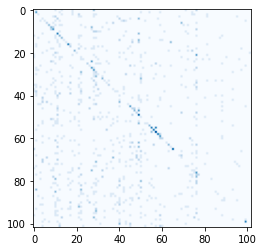

In [123]:
plt.imshow(confusion_matrix2_val, cmap=plt.cm.Blues)

# knn with new features

In [131]:
classifier = KNeighborsClassifier(n_neighbors=4)
history = classifier.fit(X_test_features, np.argmax(yc_test, axis=1))
with open('knn4_neural_colors_hog_SUTEST.pickle', 'wb') as handle:
    pickle.dump(history, handle)

In [132]:
y_pred_test = classifier.predict(X_test_features)
confusion_matrix2_test = confusion_matrix(np.argmax(yc_test, axis=1),y_pred_test)
classification_report2_test = classification_report(np.argmax(yc_test, axis=1),y_pred_test)
classification_report_DICT_test = classification_report(np.argmax(yc_test, axis=1),y_pred_test, output_dict=True)
accuracy_test = classification_report_DICT_test['accuracy']
print(classification_report2_test)

              precision    recall  f1-score   support

           0       0.53      0.85      0.65        20
           1       0.97      0.97      0.97        40
           2       0.61      0.70      0.65        20
           3       0.42      0.53      0.47        36
           4       0.75      0.89      0.82        45
           5       0.96      1.00      0.98        25
           6       0.83      1.00      0.91        20
           7       0.91      0.97      0.94        65
           8       0.74      0.88      0.81        26
           9       0.88      0.92      0.90        25
          10       0.67      0.84      0.75        67
          11       0.91      0.94      0.93        67
          12       0.91      1.00      0.95        29
          13       0.79      0.82      0.81        28
          14       0.77      0.93      0.84        29
          15       0.80      0.76      0.78        21
          16       0.95      0.94      0.95        65
          17       0.55    

In [133]:
y_pred_train = classifier.predict(X_train_features)
confusion_matrix2_train = confusion_matrix(np.argmax(yc_train, axis=1),y_pred_train)
classification_report2_train = classification_report(np.argmax(yc_train, axis=1),y_pred_train)
classification_report_DICT_train = classification_report(np.argmax(yc_train, axis=1),y_pred_train, output_dict=True)
accuracy_train = classification_report_DICT_train['accuracy']
print(classification_report2_train)

              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       1.00      1.00      1.00        10
           2       0.60      0.30      0.40        10
           3       0.43      0.30      0.35        10
           4       0.44      0.40      0.42        10
           5       0.78      0.70      0.74        10
           6       0.88      0.70      0.78        10
           7       1.00      0.90      0.95        10
           8       0.47      0.90      0.62        10
           9       0.75      0.90      0.82        10
          10       0.44      0.70      0.54        10
          11       0.77      1.00      0.87        10
          12       0.69      0.90      0.78        10
          13       0.82      0.90      0.86        10
          14       0.64      0.90      0.75        10
          15       1.00      0.10      0.18        10
          16       0.77      1.00      0.87        10
          17       0.21    

In [134]:
y_pred_val = classifier.predict(X_val_features)
confusion_matrix2_val = confusion_matrix(np.argmax(yc_val, axis=1),y_pred_val)
classification_report2_val = classification_report(np.argmax(yc_val, axis=1),y_pred_val)
classification_report_DICT_val = classification_report(np.argmax(yc_val, axis=1),y_pred_val, output_dict=True)
accuracy_val = classification_report_DICT_val['accuracy']
print(classification_report2_val)

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.89      0.80      0.84        10
           2       0.00      0.00      0.00        10
           3       0.20      0.20      0.20        10
           4       0.55      0.60      0.57        10
           5       0.80      0.80      0.80        10
           6       1.00      0.80      0.89        10
           7       0.90      0.90      0.90        10
           8       0.45      0.50      0.48        10
           9       1.00      0.90      0.95        10
          10       0.17      0.20      0.18        10
          11       1.00      0.70      0.82        10
          12       0.90      0.90      0.90        10
          13       0.64      0.70      0.67        10
          14       0.50      0.60      0.55        10
          15       1.00      0.60      0.75        10
          16       0.62      1.00      0.77        10
          17       0.53    

SVC

with open('X_train_features_colors_kps_neural.pickle', 'rb') as handle:
    X_train_features = pickle.load(handle)

In [135]:
param_grid = {'C': [1e2, 5e2, 1e3],
              'gamma': [0.005, 0.01, 0.1, 0.5, 1.0]}
clf = GridSearchCV(SVC(kernel='poly', class_weight='balanced'), param_grid, cv=5)
clf=clf.fit(X_train_features, y_train)
y_pred = clf.predict(X_train_features)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00    

In [136]:
print( 'Best Gamma:', clf.best_estimator_.gamma)
print( 'Best C:', clf.best_estimator_.C)

Best Gamma: 0.005
Best C: 100.0


In [137]:
with open('SVC_sutrain_neural_colors_hog.pickle', 'wb') as handle:
    pickle.dump(clf, handle)

In [138]:
y_pred_test = clf.predict(X_test_features)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.18      0.60      0.28        20
           2       1.00      0.80      0.89        40
           3       0.13      0.40      0.20        20
           4       0.17      0.28      0.21        36
           5       0.48      0.89      0.62        45
           6       0.96      0.96      0.96        25
           7       0.44      0.85      0.58        20
           8       0.96      0.83      0.89        65
           9       0.46      0.73      0.57        26
          10       0.65      0.80      0.71        25
          11       0.43      0.39      0.41        67
          12       0.91      0.78      0.84        67
          13       0.73      0.93      0.82        29
          14       0.68      0.68      0.68        28
          15       0.43      0.97      0.60        29
          16       0.42      0.86      0.56        21
          17       0.90      0.80      0.85        65
          18       0.41    

proviamo usando più dati. (scambiamo train e test)

In [139]:
param_grid = {'C': [1e2, 5e2, 1e3],
              'gamma': [0.005, 0.01, 0.1, 0.5, 1.0]}
clf2 = SVC(kernel='poly', class_weight='balanced', C = 1e2, gamma = 0.005)
print('fit...')
clf2=clf2.fit(X_test_features, y_test)
print('predict...')
y2_pred = clf2.predict(X_test_features)
print(classification_report(y_test, y2_pred))

fit...
predict...
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        65
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        67
          12       1.00      1.00      1.00        67
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        28
          15       1.00      1.00      1.00        29
          16       1.00      1.00      1.00        21
          17       1.00      1.00      1.00        65
         

In [140]:
with open('svc_sutest_neural_colors_hog.pickle', 'wb') as handle:
    pickle.dump(clf2, handle)

In [141]:
y_pred_train2 = clf2.predict(X_train_features)
print(classification_report(y_train, y_pred_train2))

              precision    recall  f1-score   support

           1       1.00      0.40      0.57        10
           2       1.00      1.00      1.00        10
           3       0.50      0.20      0.29        10
           4       0.83      0.50      0.62        10
           5       1.00      0.70      0.82        10
           6       0.78      0.70      0.74        10
           7       0.77      1.00      0.87        10
           8       1.00      0.90      0.95        10
           9       0.67      1.00      0.80        10
          10       1.00      1.00      1.00        10
          11       0.75      0.90      0.82        10
          12       0.90      0.90      0.90        10
          13       1.00      0.90      0.95        10
          14       1.00      1.00      1.00        10
          15       0.83      1.00      0.91        10
          16       1.00      0.70      0.82        10
          17       1.00      1.00      1.00        10
          18       0.67    

In [142]:
y_pred_val2 = clf2.predict(X_val_features)
print(classification_report(y_val, y_pred_val2))

              precision    recall  f1-score   support

           1       1.00      0.70      0.82        10
           2       1.00      0.90      0.95        10
           3       0.50      0.20      0.29        10
           4       0.57      0.40      0.47        10
           5       1.00      0.80      0.89        10
           6       1.00      1.00      1.00        10
           7       1.00      0.80      0.89        10
           8       1.00      0.90      0.95        10
           9       0.64      0.70      0.67        10
          10       1.00      1.00      1.00        10
          11       0.78      0.70      0.74        10
          12       1.00      0.90      0.95        10
          13       1.00      1.00      1.00        10
          14       0.91      1.00      0.95        10
          15       0.90      0.90      0.90        10
          16       1.00      0.90      0.95        10
          17       1.00      1.00      1.00        10
          18       0.75    

# PROVA PERFORMANCE

In [26]:
import pickle

In [30]:
with open('classif_sutest_colors_kps_neural_vggfc1.pickle', 'rb') as handle:
    classif = pickle.load(handle)

In [172]:
net = None
net=keras.models.load_model('mod3_100epochs_mobilenet.h5')

In [225]:
NAMES = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells",
    "sweet pea", "english marigold", "tiger lily", "moon orchid",
    "bird of paradise", "monkshood", "globe thistle", "snapdragon",
    "colt's foot", "king protea", "spear thistle", "yellow iris",
    "globe-flower", "purple coneflower", "peruvian lily", "balloon flower",
    "giant white arum lily", "fire lily", "pincushion flower", "fritillary",
    "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers",
    "stemless gentian", "artichoke", "sweet william", "carnation",
    "garden phlox", "love in the mist", "mexican aster", "alpine sea holly",
    "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",
    "lenten rose", "barbeton daisy", "daffodil", "sword lily", "poinsettia",
    "bolero deep blue", "wallflower", "marigold", "buttercup", "oxeye daisy",
    "common dandelion", "petunia", "wild pansy", "primula", "sunflower",
    "pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
    "pink-yellow dahlia?", "cautleya spicata", "japanese anemone",
    "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania",
    "azalea", "water lily", "rose", "thorn apple", "morning glory",
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani",
    "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow",
    "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum",
    "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow",
    "mexican petunia", "bromelia", "blanket flower", "trumpet creeper",
    "blackberry lily"
]


In [216]:
categories = {}
listimages = sorted(os.listdir('categories'))
for i in range(len(NAMES)):
    categories[NAMES[i]] = 'categories/' + listimages[i]

In [145]:
def predict_name(image_path, classifier):
    image = cv2.imread(image_path)
    mobilenet_v2.preprocess_input
    features=[]
    im_features = combo_colors_kps_neural(image_path)
    im_features = im_features.flatten()
    features.append(im_features)

    prediction = classifier.predict(features)[0]
    return NAMES[prediction-1]


In [195]:
img = kimage.load_img('mask_NEW/image_01930.jpg')
x = kimage.img_to_array(img)
x = mobilenet_v2.preprocess_input(x)
x = np.expand_dims(x, axis = 0)
print(x.shape)

prediction = net.predict(x)

(1, 224, 224, 3)


In [196]:
np.argmax(prediction[0])

53

In [194]:
NAMES[65]

'osteospermum'

In [187]:
prediction[0][48]

0.67090935

In [181]:
img = kimage.load_img('mask_NEW/image_01776.jpg')
x = kimage.img_to_array(img)
x = mobilenet_v2.preprocess_input(x)
x.shape

(224, 224, 3)

In [ ]:
prediction

In [ ]:
def predict_name_photo (image_path, classifier):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    features=[]
    im_features = neural_features(image_path) #combo_colors_kps_neural
    im_features = im_features.flatten()
    features.append(im_features)

    prediction = classifier.predict(features)[0]
    listimages = os.listdir('categories')
    path_pred_image = 'categories/' + listimages[prediction-1]
    image_pred = cv2.imread(path_pred_image)
    image_pred = cv2.cvtColor(image_pred, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1,2,1),plt.imshow(image), plt.title('What is it?')
    plt.subplot(1,2,2),plt.imshow(image_pred), plt.title(NAMES[prediction-1])

    #return NAMES[prediction-1]

In [154]:
prediction

array([[6.94517777e-09, 3.75426303e-08, 1.00134677e-07, 4.29774360e-07,
        3.86041123e-04, 3.31849833e-06, 3.73923257e-07, 1.30694636e-04,
        5.24742738e-09, 2.96214431e-08, 8.66659593e-06, 3.34765566e-08,
        7.58572156e-08, 9.87070393e-07, 1.53988494e-05, 1.90299716e-07,
        3.30165051e-08, 1.46364684e-07, 5.68441328e-06, 2.99943878e-07,
        5.33842649e-05, 3.65929509e-08, 2.59074511e-07, 5.68217217e-07,
        2.23366669e-07, 1.22598174e-03, 6.68931506e-08, 2.15902355e-06,
        3.24686908e-08, 3.70820021e-06, 1.38145868e-08, 1.17452096e-07,
        2.91808306e-07, 3.26533809e-05, 4.36302550e-09, 1.98468051e-08,
        2.20353757e-09, 5.23741805e-09, 1.05225659e-07, 1.00919613e-06,
        1.51428878e-07, 2.99304105e-07, 3.20626109e-10, 5.83725956e-09,
        1.09716103e-09, 8.89710416e-10, 4.08967168e-07, 3.68203530e-08,
        6.70909345e-01, 1.88495210e-06, 1.31482466e-06, 4.42392967e-09,
        3.47359969e-06, 7.78869344e-06, 2.85389945e-07, 2.562151

In [153]:
x.shape

(1, 224, 224, 3)

In [197]:
def predict_name(image_path, classifier):
    img = kimage.load_img(image_path)
    x = kimage.img_to_array(img)
    x = mobilenet_v2.preprocess_input(x)
    x = np.expand_dims(x, axis = 0)

    prediction = classifier.predict(x)

    return prediction[0], img

In [227]:
categories

{'pink primrose': 'categories/001.jpg',
 'hard-leaved pocket orchid': 'categories/002.jpg',
 'canterbury bells': 'categories/003.jpg',
 'sweet pea': 'categories/004.jpg',
 'english marigold': 'categories/005.jpg',
 'tiger lily': 'categories/006.jpg',
 'moon orchid': 'categories/007.jpg',
 'bird of paradise': 'categories/008.jpg',
 'monkshood': 'categories/009.jpg',
 'globe thistle': 'categories/010.jpg',
 'snapdragon': 'categories/011.jpg',
 "colt's foot": 'categories/012.jpg',
 'king protea': 'categories/013.jpg',
 'spear thistle': 'categories/014.jpg',
 'yellow iris': 'categories/015.jpg',
 'globe-flower': 'categories/016.jpg',
 'purple coneflower': 'categories/017.jpg',
 'peruvian lily': 'categories/018.jpg',
 'balloon flower': 'categories/019.jpg',
 'giant white arum lily': 'categories/020.jpg',
 'fire lily': 'categories/021.jpg',
 'pincushion flower': 'categories/022.jpg',
 'fritillary': 'categories/023.jpg',
 'red ginger': 'categories/024.jpg',
 'grape hyacinth': 'categories/025.

In [226]:
categories = {}
listimages = sorted(os.listdir('categories'))
for i in range(len(NAMES)):
    categories[NAMES[i]] = 'categories/' + listimages[i]

In [228]:
def predict_name_photo (image_path, classifier):

    prediction, image = predict_name(image_path, classifier)
    prediction_name = NAMES[np.argmax(prediction)]

    path_pred_image = categories[prediction_name]
    image_pred = cv2.imread(path_pred_image)
    image_pred = cv2.cvtColor(image_pred, cv2.COLOR_BGR2RGB)
    
    NAMES.sort()

    plt.subplot(1,2,1),plt.imshow(image), plt.title('What is it?')
    plt.subplot(1,2,2),plt.imshow(image_pred), plt.title(prediction_name)

    #return NAMES[prediction-1]

In [331]:
listdir = os.listdir('mask_NEW')

for image in listdir:
    image_path = 'mask_NEW/'+image
    img = kimage.load_img(image_path, target_size = (224,224))
    img.save ('mask_NEW/'+image)

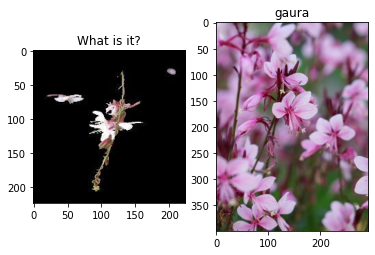

In [332]:
predict_name_photo('mask_NEW/image_07254.jpg', net)

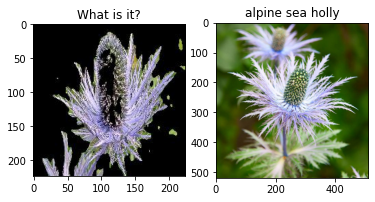

In [335]:
predict_name_photo('mask_NEW/image_06971.jpg', net)

In [159]:
predict_name('mask_val/image_04487.jpg', clf)

'sunflower'

In [77]:
min(y_train)

1

In [87]:
NAMES[68]

'windflower'

In [ ]:
y_pred_train2 = clf.predict(X_train_features)

# Prova CBIR

In [128]:
import pickle

with open ('X_train_features_vggfc1_colors.pickle', 'rb') as handle:
    X_train_features = pickle.load(handle)

In [142]:
import pickle
with open ('102flowers_y_train.pickle', 'rb') as handle:
    y_train = pickle.load(handle)
num_classes = 102
yc_train = keras.utils.to_categorical(y_train-1, num_classes)

In [140]:
X_train_features = np.asarray(X_train_features)
X_train_features.shape

(1020, 4099)

In [141]:
def NeuralNetwork(X, activation, n_outputs):
    inputs = Input(shape = (X_train_features.shape[1])) #T/X/Y/C)
    x = layers.Dense(64, activation = activation) (inputs)
    x = layers.Dense(32, activation = activation) (x)
    x = layers.Dense(16, activation = activation) (x)
    x = layers.Dense(n_outputs, activation = 'softmax') (x) #OUTPUT LAYER. the sigmoid output range is [0-1] as our target
    model = Model(inputs, x)
    model.compile(loss = 'mse', optimizer='adam', metrics=['accuracy']) #ottimizza rispetto alla loss, ma poi come metrica di valutazione usa la rmse
    return model

In [143]:
X_val_features = load_data('mask_val/',feature_extractor=combo_colors_neural)
with open('X_val_features_vggfc1_colors.pickle', 'wb') as handle:
    pickle.dump(X_val_features, handle)

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [34]:
from keras import *
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.layers import Activation, LeakyReLU
from tensorflow.keras.activations import sigmoid
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from keras.backend import abs, sum


In [256]:
dims = X_train_features.shape[1]

initializer = tf.keras.initializers.GlorotUniform(seed=7910) 

model = Sequential()
model.add(Dense(64, input_shape=(dims,), activation = 'selu', kernel_initializer=initializer))
model.add(Dense(32, activation = 'selu', kernel_initializer=initializer))
model.add(Dense(16, activation = 'selu', kernel_initializer=initializer))
model.add(Dense(102, activation = "softmax", kernel_initializer=initializer))


#model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [235]:
X_train_features.shape

(1020, 4099)

In [234]:
y_train.shape

(1020,)

In [247]:
yc_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [257]:
model.fit(np.asarray(X_train_features), yc_train, 
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_data=(np.asarray(X_val_features), yc_val))

Epoch 1/100
16/16 [==============================] - 2s 61ms/step - loss: 4.6604 - accuracy: 0.0108 - val_loss: 4.6104 - val_accuracy: 0.0176
Epoch 2/100
16/16 [==============================] - 1s 45ms/step - loss: 4.6168 - accuracy: 0.0129 - val_loss: 4.5920 - val_accuracy: 0.0275
Epoch 3/100
16/16 [==============================] - 1s 55ms/step - loss: 4.5970 - accuracy: 0.0169 - val_loss: 4.5944 - val_accuracy: 0.0167
Epoch 4/100
16/16 [==============================] - 1s 45ms/step - loss: 4.5875 - accuracy: 0.0220 - val_loss: 4.5880 - val_accuracy: 0.0206
Epoch 5/100
16/16 [==============================] - 1s 47ms/step - loss: 4.5700 - accuracy: 0.0316 - val_loss: 4.5816 - val_accuracy: 0.0216
Epoch 6/100
16/16 [==============================] - 1s 47ms/step - loss: 4.5700 - accuracy: 0.0286 - val_loss: 4.5825 - val_accuracy: 0.0333
Epoch 7/100
16/16 [==============================] - 1s 46ms/step - loss: 4.5544 - accuracy: 0.0253 - val_loss: 4.5601 - val_accuracy: 0.0343
Epoch 

In [163]:
dims = np.asarray(X_train_features).shape[1]

initializer = tf.keras.initializers.GlorotUniform(seed=7910) 

model = Sequential()
model.add(Dense(64, input_shape=(dims,), activation = 'selu', kernel_initializer=initializer))
model.add(Dense(32, activation = 'selu', kernel_initializer=initializer))
model.add(Dense(16, activation = 'selu', kernel_initializer=initializer))
model.add(Dense(1, activation = "softmax", kernel_initializer=initializer))


model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [159]:
yc_train.shape

(1020, 102)

In [167]:
np.asarray(X_val_features).shape

(1020, 4099)

In [169]:
yc_val.shape

(1020, 102)

In [164]:
n_epochs =40
network_history = model.fit(np.asarray(X_train_features), yc_train, batch_size=128, 
                            epochs=n_epochs, verbose=2, validation_data=(np.asarray(X_val_features), yc_val))

Epoch 1/40


ValueError: in user code:

    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Teresa\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 102) and (None, 1) are incompatible


In [137]:
x = X_train_features
x = keras.layers.Dense(1024, activation = 'relu')(x) #1 FN
pred = keras.layers.Dense(102, activation='softmax')(x) #1 FN

ValueError: Layer dense expects 1 input(s), but it received 1020 input tensors. Inputs received: [<tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.77146   , 30.635735  , 36.592804  , ...,  0.        ,
        1.1666025 ,  0.33654568], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.48759  , 30.020523 , 35.49189  , ...,  0.       ,  1.6415918,
        0.3944719], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.09513  , 33.95707  , 45.9478   , ...,  0.       ,  1.4754404,
        0.334174 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([22.451181 , 38.827873 , 38.720947 , ...,  0.       ,  1.3379896,
        0.0451404], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.096266  , 35.8521    , 35.051632  , ...,  0.        ,
        1.1138654 ,  0.14326078], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.960323  , 18.963724  , 44.075954  , ...,  0.        ,
        0.74552095,  0.2664334 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.742004 , 31.112787 , 37.14521  , ...,  0.       ,  1.1271493,
        0.3333685], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.211025, 32.00149 , 32.787483, ...,  0.      ,  1.024841,
        0.      ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([44.57946   , 18.078726  , 37.341816  , ...,  0.        ,
        1.0416147 ,  0.38333693], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.486534 , 31.999123 , 35.514347 , ...,  0.       ,  1.2876276,
        0.2969917], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([22.78509  , 36.53256  , 40.68235  , ...,  0.       ,  1.0466223,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.211544  , 34.668392  , 41.120064  , ...,  0.        ,
        0.76053184,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.791636 , 36.661827 , 36.546535 , ...,  0.       ,  0.8936458,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.000002 , 34.926636 , 35.073364 , ...,  0.       ,  0.7888828,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.6953125 , 43.90564   , 43.399048  , ...,  0.        ,
        0.72530645,  0.06734999], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.184036  , 17.923222  , 58.89274   , ...,  0.        ,
        0.7432933 ,  0.28330147], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.899601 , 35.34736  , 35.75304  , ...,  0.       ,  1.0018235,
        0.5704652], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([2.9228937e+01, 2.0941641e+01, 4.9829422e+01, ..., 0.0000000e+00,
       7.7418506e-01, 2.2574365e-03], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.194473  , 34.642662  , 36.16286   , ...,  0.        ,
        0.7467188 ,  0.19728097], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.505259  , 28.176573  , 44.31817   , ...,  0.        ,
        1.0046797 ,  0.10466421], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.079044  , 18.815302  , 50.105656  , ...,  0.        ,
        1.0793328 ,  0.54396665], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.12232  , 18.48115  , 44.39653  , ...,  0.       ,  1.0562936,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.174335 , 31.89906  , 34.926605 , ...,  0.       ,  0.8664283,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.958233  , 37.63106   , 26.410706  , ...,  0.        ,
        1.1605334 ,  0.04962377], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([18.440504 , 19.15622  , 62.403275 , ...,  0.       ,  1.1043094,
        0.3019111], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.476885  , 20.93914   , 53.583973  , ...,  0.        ,
        0.6728341 ,  0.20045426], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.351477  , 21.185787  , 59.462738  , ...,  0.        ,
        0.8484501 ,  0.13516334], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.066574 , 16.762886 , 63.17054  , ...,  0.       ,  1.3145552,
        0.5443858], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.725258  , 30.004135  , 30.270609  , ...,  0.        ,
        0.95542496,  0.3602036 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([38.429394 , 10.127182 , 51.44342  , ...,  0.       ,  1.5440168,
        0.356544 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.4033357,  2.0303047, 97.56636  , ...,  0.       ,  1.4259505,
        0.774747 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.524303, 24.38827 , 44.087425, ...,  0.      ,  1.52744 ,
        0.      ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.       , 15.675325 , 84.32468  , ...,  0.       ,  1.0450467,
        0.5650259], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.9361308e-02, 4.5277969e+01, 5.4702671e+01, ..., 0.0000000e+00,
       8.9719039e-01, 4.5768341e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.38316348, 47.37322   , 52.24362   , ...,  0.        ,
        1.2677494 ,  0.20416236], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.3101069, 44.56196  , 55.127937 , ...,  0.       ,  1.0979418,
        0.5338422], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([10.9056    , 11.577199  , 77.5172    , ...,  0.        ,
        1.2938278 ,  0.45736656], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.144959  , 19.494528  , 72.36052   , ...,  0.        ,
        1.4584451 ,  0.51938856], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.82156   , 15.315163  , 71.86327   , ...,  0.        ,
        1.4803033 ,  0.38736525], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([6.8486892e-03, 2.6024639e+01, 7.3968513e+01, ..., 0.0000000e+00,
       1.4743279e+00, 4.6863189e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.589579  , 33.58397   , 39.826454  , ...,  0.        ,
        0.72200996,  0.4535114 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([22.270855  , 37.49768   , 40.231464  , ...,  0.        ,
        0.9881404 ,  0.30702567], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.26291  , 33.086178 , 32.65091  , ...,  0.       ,  1.2744184,
        0.3128163], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.560598 , 37.67245  , 37.76695  , ...,  0.       ,  1.1925033,
        0.7680507], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.134844  , 36.207123  , 38.658035  , ...,  0.        ,
        1.2766684 ,  0.41513667], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.561066  , 34.28086   , 36.15807   , ...,  0.        ,
        1.0638306 ,  0.29955786], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([22.945871 , 38.113354 , 38.940777 , ...,  0.       ,  1.3502767,
        0.0919199], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.238075 , 35.385685 , 36.376236 , ...,  0.       ,  1.0219601,
        0.447843 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([18.779453  , 39.90089   , 41.319656  , ...,  0.        ,
        1.0078589 ,  0.22441253], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.87814  , 39.653484 , 26.468376 , ...,  0.       ,  0.9084974,
        1.0240332], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.3421438 , 31.269434  , 67.38842   , ...,  0.        ,
        0.97571045,  0.26708502], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.11043737, 33.566017  , 66.32355   , ...,  0.        ,
        1.4177011 ,  0.5416815 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.957024  , 14.681843  , 73.36114   , ...,  0.        ,
        1.1704341 ,  0.43635985], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.6673955 , 34.28363   , 64.04897   , ...,  0.        ,
        1.0766581 ,  0.38627955], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.0207691 , 42.99553   , 54.9837    , ...,  0.        ,
        1.1712197 ,  0.58207655], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.7410652 , 28.905851  , 70.35309   , ...,  0.        ,
        1.2091227 ,  0.30681834], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.2152815 , 23.741905  , 74.042816  , ...,  0.        ,
        1.0949901 ,  0.65648913], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.3888546, 21.47304  , 77.13811  , ...,  0.       ,  1.2229221,
        0.4266642], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.12248012, 34.701027  , 65.17649   , ...,  0.        ,
        1.1726137 ,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([15.342424 , 41.70905  , 42.948524 , ...,  0.       ,  1.2002255,
        0.4591336], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.32187247, 50.54388   , 49.134247  , ...,  0.        ,
        1.0479248 ,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([16.797367 , 39.53918  , 43.663452 , ...,  0.       ,  1.3528134,
        0.3138664], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 3.9456038 ,  6.3864655 , 89.66793   , ...,  0.        ,
        1.0798762 ,  0.39213076], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.0290694, 42.135433 , 56.835495 , ...,  0.       ,  1.4033024,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.585072  ,  0.2856345 , 97.12929   , ...,  0.        ,
        0.99056053,  0.48519298], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.987541 , 25.343355 , 45.6691   , ...,  0.       ,  1.0266263,
        0.3557773], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([10.806144  , 25.299433  , 63.89443   , ...,  0.        ,
        1.446315  ,  0.23616785], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([14.770792  , 10.00709   , 75.222115  , ...,  0.        ,
        1.0052081 ,  0.22127956], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([22.377846  , 27.813457  , 49.8087    , ...,  0.        ,
        0.95692366,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 28.486881  , 71.513115  , ...,  0.        ,
        1.2692964 ,  0.24783114], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.109772  , 39.91369   , 39.976536  , ...,  0.        ,
        1.4757951 ,  0.10709509], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([13.85518   , 43.451347  , 42.69347   , ...,  0.        ,
        1.0615673 ,  0.46761462], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([22.06088   , 40.802963  , 37.136158  , ...,  0.        ,
        0.9586159 ,  0.05850044], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.062136  , 35.858887  , 36.07898   , ...,  0.        ,
        1.1288879 ,  0.33559963], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.425356 , 34.94092  , 36.63372  , ...,  0.       ,  1.0721288,
        0.177629 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.685904  , 36.889587  , 37.42451   , ...,  0.        ,
        1.197967  ,  0.30166328], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.307415 , 36.005367 , 35.687218 , ...,  0.       ,  1.3845898,
        0.6579157], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 3.547731  ,  4.3670816 , 92.08519   , ...,  0.        ,
        0.8405977 ,  0.47917488], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.476585  , 23.435127  , 53.088284  , ...,  0.        ,
        1.2015431 ,  0.40883532], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([16.699951 ,  3.800014 , 79.50004  , ...,  0.       ,  1.1964673,
        0.7989818], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.7943783 ,  6.474004  , 91.73162   , ...,  0.        ,
        0.90119296,  0.5284002 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([21.466387 ,  1.2714586, 77.26215  , ...,  0.       ,  1.0748833,
        0.6553228], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.234919 , 38.156788 , 35.608295 , ...,  0.       ,  1.4624946,
        0.3721948], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.935673  , 22.946306  , 57.118023  , ...,  0.        ,
        1.2986865 ,  0.69143486], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.4725547,  2.5192854, 96.008156 , ...,  0.       ,  1.2565869,
        0.8159734], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([21.136885  , 22.339394  , 56.523724  , ...,  0.        ,
        0.94115925,  0.19028884], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.662268  , 34.362854  , 34.974876  , ...,  0.        ,
        0.98828566,  0.67178476], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([17.497175 , 38.289352 , 44.21347  , ...,  0.       ,  0.9086823,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([49.19228   ,  6.660999  , 44.14672   , ...,  0.        ,
        0.917659  ,  0.36150178], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.840548  , 38.948135  , 34.211315  , ...,  0.        ,
        0.71083015,  0.74775994], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.421932 , 31.555796 , 37.022274 , ...,  0.       ,  1.0616255,
        0.1983346], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.709827  , 15.656326  , 63.633846  , ...,  0.        ,
        0.94428134,  0.3070044 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([48.263176  , 26.363077  , 25.373745  , ...,  0.        ,
        1.1853079 ,  0.49287507], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([48.60793   , 19.0753    , 32.316772  , ...,  0.        ,
        1.2169129 ,  0.62620354], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.807472  , 24.173157  , 38.01937   , ...,  0.        ,
        0.7586342 ,  0.22392008], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.3989    , 25.21856   , 42.382545  , ...,  0.        ,
        1.1561242 ,  0.49168065], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.447773  , 28.942904  , 36.60932   , ...,  0.        ,
        0.98697305,  0.6331686 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 9.670832  ,  6.6396384 , 83.68953   , ...,  0.        ,
        0.97596455,  0.6479566 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.320847 , 10.425407 , 53.253746 , ...,  0.       ,  1.0916318,
        0.6194812], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 4.6187425 , 36.894436  , 58.486824  , ...,  0.        ,
        1.2024716 ,  0.43728098], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 4.0314264, 35.6714   , 60.297173 , ...,  0.       ,  1.2998666,
        0.3970271], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.047854  , 23.170502  , 64.78164   , ...,  0.        ,
        1.0112214 ,  0.53747773], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.131046  , 23.391733  , 40.477222  , ...,  0.        ,
        1.0370106 ,  0.46067283], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.472843 , 29.770004 , 41.757153 , ...,  0.       ,  0.9403219,
        0.7380843], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.50669   , 33.110104  , 34.38321   , ...,  0.        ,
        1.2672895 ,  0.45586225], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 9.437254  ,  7.886811  , 82.675934  , ...,  0.        ,
        0.8944517 ,  0.66264975], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.6951163 ,  2.4628787 , 95.842     , ...,  0.        ,
        0.86797196,  0.46730992], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.43419   , 27.137878  , 37.427937  , ...,  0.        ,
        1.1328717 ,  0.70299375], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.171677 , 25.95014  , 40.87818  , ...,  0.       ,  0.9301362,
        0.4684091], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.363853  , 13.727427  , 50.908722  , ...,  0.        ,
        0.8342328 ,  0.23895016], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([2.6531908e+01, 3.4675777e+01, 3.8792316e+01, ..., 0.0000000e+00,
       1.2381380e+00, 3.7924036e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.450424  , 12.32756   , 53.22202   , ...,  0.        ,
        0.83934814,  0.30369738], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.827406  , 16.405682  , 55.76691   , ...,  0.        ,
        0.65914685,  0.25101662], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.824     , 21.128374  , 45.047626  , ...,  0.        ,
        0.969067  ,  0.32958126], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.578804  , 16.672253  , 46.748943  , ...,  0.        ,
        0.5996038 ,  0.18413281], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.356133  , 18.416819  , 49.227047  , ...,  0.        ,
        0.79644644,  0.1450232 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.79414   , 22.091759  , 43.1141    , ...,  0.        ,
        0.79388463,  0.32582968], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.646456  , 31.6807    , 44.672844  , ...,  0.        ,
        1.1116772 ,  0.32690036], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.08      , 20.969326  , 54.950672  , ...,  0.        ,
        1.2529514 ,  0.24860713], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([5.7089162e+00, 3.2954823e+01, 6.1336262e+01, ..., 0.0000000e+00,
       1.2230446e+00, 5.4579228e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([14.043967  , 23.714117  , 62.241917  , ...,  0.        ,
        0.80749524,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.159344  , 30.311092  , 40.529564  , ...,  0.        ,
        0.8433331 ,  0.28447035], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.772781  , 20.667406  , 59.559814  , ...,  0.        ,
        1.2975574 ,  0.07756889], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 9.337007  , 22.781826  , 67.881165  , ...,  0.        ,
        1.4584811 ,  0.45027164], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.4916081, 28.49051  , 69.01788  , ...,  0.       ,  0.9442728,
        0.6064687], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 7.065157  , 10.783828  , 82.15102   , ...,  0.        ,
        0.6361143 ,  0.13432568], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.713978  ,  0.61050314, 67.67552   , ...,  0.        ,
        1.0693445 ,  0.27424562], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([44.921234 , 41.58328  , 13.495488 , ...,  0.       ,  0.9277342,
        0.2142717], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.785381  , 33.380356  , 34.83426   , ...,  0.        ,
        1.416419  ,  0.55792296], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.040005  , 32.487186  , 32.47281   , ...,  0.        ,
        0.97301644,  0.1841433 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([88.1966    ,  7.0699253 ,  4.733469  , ...,  0.        ,
        1.0724883 ,  0.18780762], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.472626 , 35.712673 , 34.8147   , ...,  0.       ,  1.1133497,
        0.3607603], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.91934   , 39.39469   , 20.685968  , ...,  0.        ,
        0.91387963,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.101807  , 33.14081   , 26.757383  , ...,  0.        ,
        1.0633938 ,  0.41060814], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 9.738092  , 39.655174  , 50.606735  , ...,  0.        ,
        1.2684155 ,  0.12835252], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.968033 , 36.563618 , 33.46835  , ...,  0.       ,  1.2387716,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.84205  , 33.146767 , 34.011185 , ...,  0.       ,  0.7394326,
        0.4086196], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.96147   ,  6.5683613 , 73.47017   , ...,  0.        ,
        0.7116194 ,  0.72460616], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.34674  , 14.868114 , 48.785145 , ...,  0.       ,  1.2385958,
        0.3786225], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.23262924, 48.730785  , 51.036583  , ...,  0.        ,
        1.063113  ,  0.8653927 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.084974 , 34.959538 , 45.95549  , ...,  0.       ,  0.7351023,
        0.3252784], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.17022349, 38.215626  , 61.61415   , ...,  0.        ,
        1.0798229 ,  0.651108  ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.123245  ,  5.8126783 , 62.064075  , ...,  0.        ,
        0.64335835,  0.43036494], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.4940760e-03, 1.4724119e+00, 9.8526093e+01, ..., 0.0000000e+00,
       9.8263395e-01, 2.9562736e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.39314395, 42.70646   , 56.900394  , ...,  0.        ,
        1.2505782 ,  0.35445097], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([7.5246170e-02, 1.4691409e+01, 8.5233345e+01, ..., 0.0000000e+00,
       9.7467899e-01, 5.1086199e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 45.014862  , 54.985134  , ...,  0.        ,
        1.415125  ,  0.47393677], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.477373  , 36.35181   , 32.17082   , ...,  0.        ,
        1.363257  ,  0.22873017], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([18.300957 , 18.759722 , 62.939323 , ...,  0.       ,  1.1664065,
        0.2461775], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([16.99305  , 29.945496 , 53.061455 , ...,  0.       ,  1.1074382,
        0.3479754], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.056082  , 22.57718   , 46.366737  , ...,  0.        ,
        0.91155934,  0.41169664], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.0969435e+01, 1.5883099e+01, 7.3147461e+01, ..., 0.0000000e+00,
       1.4289694e+00, 1.8646389e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([14.697991 , 19.707918 , 65.594086 , ...,  0.       ,  1.2718146,
        0.5734478], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.1586897,  6.7315674, 93.10974  , ...,  0.       ,  1.6929053,
        0.6659471], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.058048  , 17.517296  , 62.424652  , ...,  0.        ,
        1.07155   ,  0.29589868], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.778105 , 43.345665 , 43.876232 , ...,  0.       ,  1.3219682,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.088448 , 20.459599 , 52.451958 , ...,  0.       ,  1.2126541,
        0.7756047], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([42.659954 ,  6.3185325, 51.021515 , ...,  0.       ,  0.5468732,
        0.2747258], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.47835   , 16.446058  , 43.07559   , ...,  0.        ,
        0.9598606 ,  0.37684235], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.926243  , 30.240757  , 34.833     , ...,  0.        ,
        0.9042902 ,  0.38966057], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([43.62131   , 10.127136  , 46.251553  , ...,  0.        ,
        1.0294961 ,  0.55298555], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([76.51531   , 13.245724  , 10.238965  , ...,  0.        ,
        1.2744377 ,  0.27276167], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([56.82284   , 23.112947  , 20.06421   , ...,  0.        ,
        1.3683589 ,  0.20900747], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.440527  , 38.077293  , 30.482182  , ...,  0.        ,
        1.1609274 ,  0.42072228], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.122276 ,  9.270731 , 51.606987 , ...,  0.       ,  1.3242323,
        0.7348317], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([53.47625   , 39.441483  ,  7.082266  , ...,  0.        ,
        1.4315629 ,  0.25697938], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.368782 , 32.170277 , 32.46094  , ...,  0.       ,  1.401277 ,
        0.5525372], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.74835  , 29.326311 , 40.92534  , ...,  0.       ,  0.7650856,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.821182  , 15.877967  , 44.300854  , ...,  0.        ,
        0.86950356,  0.5133095 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.36122  , 32.640858 , 30.997921 , ...,  0.       ,  0.7430811,
        0.5470673], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([61.07135   , 29.800045  ,  9.128607  , ...,  0.        ,
        1.1955452 ,  0.40412918], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.637646  , 32.358368  , 36.00399   , ...,  0.        ,
        0.9537596 ,  0.08795124], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.15032   , 34.967293  , 29.882393  , ...,  0.        ,
        1.3955897 ,  0.09883356], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.55196   , 33.65625   , 34.79179   , ...,  0.        ,
        0.8546604 ,  0.50434613], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.70131  , 27.416029 , 51.88266  , ...,  0.       ,  1.6488129,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([21.359118  , 27.385511  , 51.25537   , ...,  0.        ,
        0.97986025,  0.26389733], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.699797  , 37.100304  , 39.1999    , ...,  0.        ,
        0.8412868 ,  0.60507894], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([2.0260528e-02, 2.8603096e-02, 9.9951134e+01, ..., 0.0000000e+00,
       1.2467351e+00, 3.8298753e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.540442 ,  1.3061212, 97.153435 , ...,  0.       ,  1.183687 ,
        0.2510548], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.2277361e-02, 1.8037347e-02, 9.9949684e+01, ..., 0.0000000e+00,
       1.1597486e+00, 4.9743012e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.5672643,  1.1211693, 97.31157  , ...,  0.       ,  1.1874646,
        0.5254415], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([0.0000000e+00, 3.9915699e-03, 9.9996010e+01, ..., 0.0000000e+00,
       1.3452158e+00, 6.9153750e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.5473754e-02, 1.3754449e-02, 9.9970772e+01, ..., 0.0000000e+00,
       1.0661705e+00, 3.7462172e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        ,  0.4227001 , 99.5773    , ...,  0.        ,
        0.86108494,  0.49306747], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.1941595e-02, 1.6283993e-02, 9.9971779e+01, ..., 0.0000000e+00,
       1.2162322e+00, 3.5451797e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.3935572 ,  0.87665963, 98.72978   , ...,  0.        ,
        1.472035  ,  0.27902204], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([6.2649682e-02, 4.2440105e-02, 9.9894913e+01, ..., 0.0000000e+00,
       1.0423899e+00, 4.4069263e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 4.0968204 ,  5.2219143 , 90.68127   , ...,  0.        ,
        1.2501043 ,  0.41188434], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.736057 ,  8.505983 , 82.757965 , ...,  0.       ,  1.0310435,
        0.4046009], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.11944274,  1.5924004 , 98.288155  , ...,  0.        ,
        0.733006  ,  0.69566333], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.29908305,  1.0326236 , 98.6683    , ...,  0.        ,
        1.1155592 ,  0.5581993 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.45635444,  1.7611973 , 97.78245   , ...,  0.        ,
        0.68892324,  0.51255774], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.49439633,  0.9662034 , 98.5394    , ...,  0.        ,
        0.88061094,  0.1715084 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        ,  0.56838894, 99.43161   , ...,  0.        ,
        0.8973457 ,  0.10820636], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        ,  0.11485732, 99.88514   , ...,  0.        ,
        1.0130154 ,  0.33165064], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([0.0000000e+00, 1.1708505e-03, 9.9998833e+01, ..., 0.0000000e+00,
       7.8689259e-01, 6.7302763e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([0.0000000e+00, 1.4663904e-02, 9.9985336e+01, ..., 0.0000000e+00,
       8.2115680e-01, 2.4137419e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([48.852028 ,  5.7968693, 45.3511   , ...,  0.       ,  1.4121678,
        1.2052478], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.260496 ,  7.8064957, 68.933014 , ...,  0.       ,  1.1115731,
        0.5237256], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([47.90887   ,  2.6182392 , 49.47289   , ...,  0.        ,
        1.2900636 ,  0.39205822], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.180763  ,  8.8506775 , 59.96856   , ...,  0.        ,
        1.1655518 ,  0.69992113], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([46.485836 ,  1.3282186, 52.185947 , ...,  0.       ,  0.9988859,
        0.3878356], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.783823  , 20.601461  , 48.61471   , ...,  0.        ,
        1.104154  ,  0.47547087], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.754295  ,  9.314529  , 56.931175  , ...,  0.        ,
        0.82531327,  0.20645371], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.7249611e+01, 6.9621727e-03, 6.2743423e+01, ..., 0.0000000e+00,
       1.3896668e+00, 5.0702882e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.359543 , 14.321793 , 56.318665 , ...,  0.       ,  1.2859885,
        0.7130041], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , ..., 0.        , 1.066868  ,
       0.29414532], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.16862354, 10.7841    , 89.04728   , ...,  0.        ,
        1.1056088 ,  0.15294376], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.62924886, 30.008709  , 69.362045  , ...,  0.        ,
        1.1713848 ,  0.6169174 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.1888885 , 32.340588  , 65.47053   , ...,  0.        ,
        1.0056397 ,  0.36535415], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 4.5470877 , 25.465485  , 69.98743   , ...,  0.        ,
        1.053134  ,  0.37911853], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.22247176, 17.921568  , 81.85596   , ...,  0.        ,
        1.0066991 ,  0.4682385 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.29706  , 31.193659 , 66.509285 , ...,  0.       ,  1.45547  ,
        0.4283708], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.096198  , 39.73374   , 48.170055  , ...,  0.        ,
        0.93588245,  0.48085716], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.23099102, 16.588343  , 83.180664  , ...,  0.        ,
        0.8423993 ,  0.31963646], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.1729685 , 29.11014   , 69.71689   , ...,  0.        ,
        0.9738361 ,  0.29781607], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.8987693 , 29.165512  , 68.935715  , ...,  0.        ,
        0.93951434,  0.44866106], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.8007    , 22.586304  , 44.612995  , ...,  0.        ,
        0.8910941 ,  0.20151949], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.130293  , 39.134026  , 35.735683  , ...,  0.        ,
        0.7262136 ,  0.46975842], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([14.410565 , 36.233173 , 49.356262 , ...,  0.       ,  1.1905141,
        0.4202461], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([52.980793  ,  9.168712  , 37.850494  , ...,  0.        ,
        1.0380477 ,  0.41621003], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 4.055877 , 16.912914 , 79.031204 , ...,  0.       ,  1.0310868,
        0.504524 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.230597  ,  3.1579216 , 65.61148   , ...,  0.        ,
        0.9130973 ,  0.24885455], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([45.0965    ,  5.0161076 , 49.88739   , ...,  0.        ,
        0.73764616,  0.34783086], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([14.414377  ,  6.9550896 , 78.63053   , ...,  0.        ,
        0.6002473 ,  0.22720715], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([52.651733  ,  7.8171306 , 39.531136  , ...,  0.        ,
        0.76240367,  0.40230832], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.38407   , 33.39425   , 42.221684  , ...,  0.        ,
        0.9587771 ,  0.15642616], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.553185  , 18.783138  , 68.66367   , ...,  0.        ,
        1.2575477 ,  0.10191005], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([17.09035  , 40.778946 , 42.130707 , ...,  0.       ,  1.253841 ,
        0.6483941], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.5289105e+01, 3.3670235e+01, 5.1040661e+01, ..., 0.0000000e+00,
       8.8260406e-01, 1.2834683e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.282433  , 26.527878  , 43.18969   , ...,  0.        ,
        1.1744301 ,  0.46378693], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 9.728329  , 15.1329565 , 75.13872   , ...,  0.        ,
        1.2269309 ,  0.54257035], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 9.203947  , 29.125504  , 61.670547  , ...,  0.        ,
        1.4590062 ,  0.64282775], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.07697613, 53.420544  , 46.50248   , ...,  0.        ,
        0.86912155,  0.26333833], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.344887  , 27.660498  , 39.994614  , ...,  0.        ,
        1.6469805 ,  0.41666165], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([21.74728   , 38.06997   , 40.18275   , ...,  0.        ,
        1.2573102 ,  0.21031073], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.259468  , 12.073813  , 54.666718  , ...,  0.        ,
        1.1384684 ,  0.54935026], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.       , 42.33101  , 57.66899  , ...,  0.       ,  1.0732158,
        0.5184783], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 36.427628  , 63.572372  , ...,  0.        ,
        1.1481023 ,  0.20936531], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 48.11703   , 51.88297   , ...,  0.        ,
        0.7537314 ,  0.19899726], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.06187904, 43.92925   , 56.00887   , ...,  0.        ,
        1.1916525 ,  0.31361866], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([16.011255  , 39.012207  , 44.97654   , ...,  0.        ,
        1.1078755 ,  0.30655944], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 3.6464512, 43.490593 , 52.86296  , ...,  0.       ,  1.2992638,
        0.2078954], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.990668 , 39.286407 , 47.722923 , ...,  0.       ,  1.0850934,
        0.5960661], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([7.9936050e-03, 2.6549959e+01, 7.3442047e+01, ..., 0.0000000e+00,
       9.4376063e-01, 3.7415329e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 42.719055  , 57.280945  , ...,  0.        ,
        0.9079951 ,  0.41107836], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.0128882 , 42.250237  , 56.736874  , ...,  0.        ,
        1.0046606 ,  0.37421414], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([22.250853 , 36.660275 , 41.08887  , ...,  0.       ,  1.1832933,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([15.074646 , 33.752335 , 51.17302  , ...,  0.       ,  0.8731046,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.52089  , 12.2327   , 75.246414 , ...,  0.       ,  1.1113876,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.246568 , 32.00007  , 55.75336  , ...,  0.       ,  1.1286658,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([18.578749 , 17.486902 , 63.93435  , ...,  0.       ,  0.9023428,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 6.2355585, 17.418415 , 76.34603  , ...,  0.       ,  0.9570328,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([15.263663 , 27.486927 , 57.24941  , ...,  0.       ,  1.4456146,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([10.4667425, 30.834282 , 58.698975 , ...,  0.       ,  0.7290801,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.216449 , 20.494278 , 68.289276 , ...,  0.       ,  1.2302685,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([16.914404 , 31.51571  , 51.569885 , ...,  0.       ,  0.8119043,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([10.498522  , 39.699806  , 49.80167   , ...,  0.        ,
        0.9335709 ,  0.39414713], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([46.2358   , 18.582462 , 35.181736 , ...,  0.       ,  1.1815754,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.5449832e+01, 4.1043846e+01, 4.3506317e+01, ..., 0.0000000e+00,
       9.5567495e-01, 2.4901420e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.549482 , 36.781063 , 39.669456 , ...,  0.       ,  0.8771001,
        0.2986818], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.79029   , 34.97382   , 41.23589   , ...,  0.        ,
        1.2292687 ,  0.53409266], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.920568 , 28.218592 , 50.86084  , ...,  0.       ,  1.0675862,
        0.1444509], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.043808 , 22.663603 , 41.29259  , ...,  0.       ,  0.7848299,
        0.0650197], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([46.718834  , 11.13128   , 42.149887  , ...,  0.        ,
        1.0355067 ,  0.36587223], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([4.8757030e+01, 2.2024029e+01, 2.9218943e+01, ..., 0.0000000e+00,
       9.3802106e-01, 3.5901442e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.576414  , 35.676563  , 43.747025  , ...,  0.        ,
        0.9833953 ,  0.09072047], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.49605  , 27.53735  , 39.966602 , ...,  0.       ,  0.8009109,
        0.5794014], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.249382  , 14.74465   , 57.005966  , ...,  0.        ,
        0.8093715 ,  0.25197396], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.916737  , 21.506035  , 42.57723   , ...,  0.        ,
        1.119731  ,  0.51184475], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.10858   , 10.448727  , 55.44269   , ...,  0.        ,
        1.1509309 ,  0.70670855], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.40016   , 19.702372  , 48.89747   , ...,  0.        ,
        1.4292362 ,  0.46918085], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.038961 , 10.862338 , 58.098698 , ...,  0.       ,  1.2255852,
        0.4303861], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.121834  , 28.34897   , 39.529194  , ...,  0.        ,
        1.3876824 ,  0.54912794], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.864447 , 22.595156 , 46.540398 , ...,  0.       ,  1.6229722,
        0.7884002], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.778658  , 23.932127  , 48.289215  , ...,  0.        ,
        1.0210768 ,  0.49781284], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.702866  , 28.377747  , 38.919388  , ...,  0.        ,
        1.2146105 ,  0.39019546], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.553274  ,  2.072323  , 73.374405  , ...,  0.        ,
        0.7907213 ,  0.89617324], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([42.621918 ,  6.9307394, 50.44734  , ...,  0.       ,  1.3292667,
        0.7765002], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.643494 ,  0.4331775, 61.923332 , ...,  0.       ,  1.4811801,
        0.6340517], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.026773  , 11.248817  , 69.7244    , ...,  0.        ,
        1.3116814 ,  0.75398016], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.30598   , 22.448223  , 47.245796  , ...,  0.        ,
        0.8711971 ,  0.49141416], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.322678  , 20.076933  , 49.60039   , ...,  0.        ,
        1.499965  ,  0.20493925], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([44.01287   , 14.012573  , 41.974556  , ...,  0.        ,
        1.1687119 ,  0.25829238], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.92762 , 19.022083, 50.050293, ...,  0.      ,  1.192489,
        0.637831], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([5.0583221e+01, 2.9418560e+01, 1.9998222e+01, ..., 0.0000000e+00,
       1.1051506e+00, 3.4973577e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.187798 , 18.457771 , 47.35443  , ...,  0.       ,  1.3948363,
        0.3672211], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([5.5052896e+00, 2.0027739e+01, 7.4466972e+01, ..., 0.0000000e+00,
       1.2098377e+00, 5.7705000e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.028557  , 33.8291    , 33.14234   , ...,  0.        ,
        0.836786  ,  0.21795449], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.272457  , 34.839966  , 34.88758   , ...,  0.        ,
        1.1238679 ,  0.36683825], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([45.273758  , 30.372467  , 24.353777  , ...,  0.        ,
        1.318943  ,  0.13509592], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([48.361217  , 21.635792  , 30.00299   , ...,  0.        ,
        0.9545058 ,  0.36598298], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.169136  , 34.01832   , 36.812546  , ...,  0.        ,
        1.3326833 ,  0.75543225], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.19661   , 33.63064   , 34.172745  , ...,  0.        ,
        1.1644913 ,  0.55534303], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.3667948, 46.466263 , 53.166943 , ...,  0.       ,  1.4204884,
        0.4530342], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 7.4723444 , 46.913235  , 45.61442   , ...,  0.        ,
        1.1188759 ,  0.18278587], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.26979   , 37.016903  , 30.713308  , ...,  0.        ,
        1.1851087 ,  0.32510614], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.014526 , 23.71558  , 41.269894 , ...,  0.       ,  1.4647142,
        0.5450796], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.665527 , 14.839946 , 45.494526 , ...,  0.       ,  1.32793  ,
        0.3986875], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.3204685e+01, 1.0153355e+01, 5.6641960e+01, ..., 0.0000000e+00,
       9.1264367e-01, 4.1110903e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.23951  , 21.026289 , 42.734203 , ...,  0.       ,  1.0526975,
        0.7423941], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.8618999e+01, 5.8515744e+00, 5.5529427e+01, ..., 0.0000000e+00,
       7.9655302e-01, 1.3460025e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.057953 , 16.454403 , 57.487648 , ...,  0.       ,  1.0183061,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.363148  , 26.029453  , 40.6074    , ...,  0.        ,
        1.2631688 ,  0.44908622], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.84406  , 14.191098 , 50.964844 , ...,  0.       ,  1.1992853,
        0.5267385], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.485085  , 29.188711  , 44.326202  , ...,  0.        ,
        0.5626296 ,  0.49901882], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.10683  ,  6.962362 , 55.930813 , ...,  0.       ,  1.112046 ,
        0.8764843], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.310495 , 24.959179 , 49.730324 , ...,  0.       ,  1.0103545,
        0.3326913], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.31124  , 30.591063 , 40.0977   , ...,  0.       ,  1.2023747,
        0.5338173], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.33038   ,  8.713694  , 51.955925  , ...,  0.        ,
        0.64088637,  0.5979762 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.21839  ,  7.825478 , 57.95613  , ...,  0.       ,  0.8935592,
        0.7496679], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([38.873238  , 16.246933  , 44.87983   , ...,  0.        ,
        0.63938123,  0.6325151 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.94604  , 24.365486 , 46.688473 , ...,  0.       ,  1.0896243,
        0.5308089], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.401514  ,  7.685995  , 62.912495  , ...,  0.        ,
        0.8251121 ,  0.54198444], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.803905  , 28.272217  , 37.923874  , ...,  0.        ,
        0.5060409 ,  0.70359063], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.502663  ,  2.426696  , 62.070637  , ...,  0.        ,
        0.91516864,  0.40633717], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([38.450943  , 24.900875  , 36.648182  , ...,  0.        ,
        1.0593709 ,  0.38789997], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([52.975155  , 23.695257  , 23.329588  , ...,  0.        ,
        0.59327453,  0.3810303 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.182739  , 40.741364  , 48.075897  , ...,  0.        ,
        1.3113619 ,  0.09917381], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.4575229, 45.48789  , 52.05459  , ...,  0.       ,  0.8584199,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.5794132 , 44.154865  , 55.26572   , ...,  0.        ,
        1.0609539 ,  0.05596316], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.042162  , 39.204727  , 40.753113  , ...,  0.        ,
        1.3391819 ,  0.13718548], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([10.572774  , 43.54398   , 45.883247  , ...,  0.        ,
        0.7299245 ,  0.21402776], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.4661963e-01, 5.0080181e+01, 4.9773197e+01, ..., 0.0000000e+00,
       1.1362352e+00, 3.7687704e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.3488655 , 47.40901   , 51.242126  , ...,  0.        ,
        1.0106497 ,  0.26562718], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([9.8392051e-03, 4.4608681e+01, 5.5381477e+01, ..., 0.0000000e+00,
       1.3001164e+00, 4.1387799e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.19418144, 38.154934  , 61.650883  , ...,  0.        ,
        0.66133   ,  0.23780602], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 3.315587  , 46.967     , 49.717415  , ...,  0.        ,
        1.39094   ,  0.21028557], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.567287  , 16.798487  , 48.634228  , ...,  0.        ,
        0.97936   ,  0.23879623], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.324436  , 33.355602  , 40.319958  , ...,  0.        ,
        0.7812139 ,  0.26434016], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.60894  , 28.63228  , 36.758778 , ...,  0.       ,  1.0975766,
        0.1811654], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([49.8379    , 18.827549  , 31.334553  , ...,  0.        ,
        0.81902826,  0.502056  ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([51.61401  , 22.003918 , 26.382069 , ...,  0.       ,  0.7806049,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.559212  , 24.09583   , 48.34496   , ...,  0.        ,
        1.1589462 ,  0.07108115], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([46.38012  , 25.239435 , 28.380442 , ...,  0.       ,  1.1915635,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.087057  , 33.396755  , 37.516186  , ...,  0.        ,
        0.84052193,  0.08487421], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.89316   , 24.18703   , 38.919807  , ...,  0.        ,
        0.926828  ,  0.10873494], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.462849 , 33.972515 , 46.564632 , ...,  0.       ,  1.0198851,
        0.0828273], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.95303  , 33.272354 , 35.774616 , ...,  0.       ,  1.1949009,
        0.5098921], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([42.456356 , 20.629326 , 36.914318 , ...,  0.       ,  1.2442524,
        0.5284847], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.786049  , 36.14658   , 33.06737   , ...,  0.        ,
        1.2109462 ,  0.34642085], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.35771  , 38.80051  , 36.84178  , ...,  0.       ,  1.1396685,
        0.4158862], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.063805 , 27.990946 , 41.945248 , ...,  0.       ,  1.1364719,
        0.4254714], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.464405  , 30.046064  , 32.489532  , ...,  0.        ,
        0.92085814,  0.33093283], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([57.380123  , 15.078418  , 27.541456  , ...,  0.        ,
        0.912019  ,  0.06879973], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.253872  , 42.638065  , 24.10806   , ...,  0.        ,
        1.2410778 ,  0.21849385], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.189705  , 24.823122  , 34.987175  , ...,  0.        ,
        0.91863126,  0.28523204], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([58.140064  , 23.76482   , 18.095116  , ...,  0.        ,
        0.97931296,  0.45971182], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.369501 , 23.645693 , 50.984806 , ...,  0.       ,  1.0907556,
        0.306613 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.104017  , 26.51161   , 49.384373  , ...,  0.        ,
        1.4756817 ,  0.70139813], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.679825  , 24.613272  , 47.706905  , ...,  0.        ,
        1.6212087 ,  0.97286534], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.466827  , 26.43749   , 43.09568   , ...,  0.        ,
        1.0184125 ,  0.06720278], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.901299 , 17.580091 , 54.518612 , ...,  0.       ,  1.3724794,
        0.6691905], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 7.922846  , 10.258204  , 81.81895   , ...,  0.        ,
        1.3470317 ,  0.45974508], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([14.873831 , 14.14819  , 70.97798  , ...,  0.       ,  1.7695502,
        1.1845342], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.47001   , 34.793476  , 28.736519  , ...,  0.        ,
        1.329305  ,  0.53495896], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.2689807 ,  2.0891407 , 95.641884  , ...,  0.        ,
        1.0160488 ,  0.17756185], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.819265 , 17.473013 , 62.70772  , ...,  0.       ,  1.2432575,
        0.5499903], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([42.569687  , 18.884623  , 38.545692  , ...,  0.        ,
        0.53765935,  0.5589644 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.321457  , 19.811674  , 40.866867  , ...,  0.        ,
        1.0129883 ,  0.56196964], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.15786   , 26.042572  , 50.79957   , ...,  0.        ,
        0.92140853,  0.39752284], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([42.951813  ,  7.2216706 , 49.826515  , ...,  0.        ,
        1.2281833 ,  0.40274522], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.480862 , 25.129314 , 43.38982  , ...,  0.       ,  1.0186185,
        0.2097846], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.7409   , 33.67649  , 33.58261  , ...,  0.       ,  1.0520151,
        0.1261017], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.05088   , 32.938057  , 33.01106   , ...,  0.        ,
        1.109401  ,  0.43367592], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.235302  , 23.696636  , 40.06806   , ...,  0.        ,
        0.87301534,  0.04942289], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.89209  , 31.914953 , 33.19296  , ...,  0.       ,  1.4013922,
        0.1076926], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([22.575184 ,  7.998812 , 69.426    , ...,  0.       ,  1.0005704,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.52504 , 31.419611, 49.05535 , ...,  0.      ,  1.466744,
        0.      ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.02199   , 25.3118    , 62.666206  , ...,  0.        ,
        1.279447  ,  0.08819446], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 5.9033885 , 37.75912   , 56.337486  , ...,  0.        ,
        1.312072  ,  0.54847467], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 3.4413674, 30.60976  , 65.948875 , ...,  0.       ,  1.3023044,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.97891214e-04, 4.17447548e+01, 5.82548485e+01, ...,
       0.00000000e+00, 1.01232135e+00, 1.11172915e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.195984 , 42.296936 , 25.507084 , ...,  0.       ,  1.2512298,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([13.906744  , 14.190358  , 71.90289   , ...,  0.        ,
        1.3502597 ,  0.27741545], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.0436511 , 36.994217  , 61.962128  , ...,  0.        ,
        1.7116642 ,  0.22576386], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([10.220448 , 15.240842 , 74.53871  , ...,  0.       ,  1.6499162,
        1.1986676], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 5.0240154 , 29.919502  , 65.05648   , ...,  0.        ,
        1.1617256 ,  0.17124805], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.7630553, 38.615223 , 58.621723 , ...,  0.       ,  1.2032295,
        0.5726224], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.28957528, 33.967457  , 65.742966  , ...,  0.        ,
        1.528074  ,  0.1713635 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.12682718, 33.90911   , 65.96406   , ...,  0.        ,
        0.94274443,  0.43918547], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([16.188429 , 34.541195 , 49.270374 , ...,  0.       ,  1.049232 ,
        0.2517177], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 4.4650645 , 35.571117  , 59.96382   , ...,  0.        ,
        1.0279514 ,  0.29135826], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.9224656 , 30.541409  , 66.536125  , ...,  0.        ,
        0.50706077,  0.2577556 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 7.249872  , 36.660984  , 56.089146  , ...,  0.        ,
        1.0071579 ,  0.18817073], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([15.802961  , 35.858727  , 48.33831   , ...,  0.        ,
        0.74098736,  0.62285316], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.16726418, 38.281975  , 61.55076   , ...,  0.        ,
        0.70764273,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.025417  , 31.794939  , 42.179646  , ...,  0.        ,
        0.7863335 ,  0.22486052], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.227769  , 28.519014  , 59.253216  , ...,  0.        ,
        1.222876  ,  0.39583567], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.021814  , 30.196465  , 46.781723  , ...,  0.        ,
        1.0564146 ,  0.78077793], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.74595  , 38.64272  , 31.611326 , ...,  0.       ,  1.3547223,
        0.5264386], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.771347  , 34.79947   , 36.429184  , ...,  0.        ,
        1.207268  ,  0.44577107], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([18.965975 , 33.998184 , 47.03584  , ...,  0.       ,  1.0007604,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.817358  , 22.611206  , 45.571434  , ...,  0.        ,
        1.0293647 ,  0.38580814], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.142372 , 26.48856  , 41.36907  , ...,  0.       ,  1.2686973,
        0.6478976], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.838797  , 27.473793  , 47.687412  , ...,  0.        ,
        1.4124321 ,  0.32088196], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.508881  , 28.308764  , 59.182358  , ...,  0.        ,
        1.1862446 ,  0.24823555], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([8.0210477e-04, 4.9787041e+01, 5.0212158e+01, ..., 0.0000000e+00,
       1.3133388e+00, 6.4201427e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.5138567, 50.30954  , 49.176605 , ...,  0.       ,  1.4025794,
        0.4752579], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.22796872, 49.86547   , 49.90656   , ...,  0.        ,
        1.2474638 ,  0.480862  ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.05985796, 46.760185  , 53.179955  , ...,  0.        ,
        1.5230529 ,  0.80460536], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 48.468952  , 51.531048  , ...,  0.        ,
        1.3668383 ,  0.44302705], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([4.1379940e-04, 5.0331245e+01, 4.9668339e+01, ..., 0.0000000e+00,
       1.0154833e+00, 5.7536530e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([15.075743, 38.767807, 46.156452, ...,  0.      ,  1.177923,
        0.488901], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.15937987, 48.73764   , 51.102985  , ...,  0.        ,
        1.1683509 ,  0.41221264], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.890296  , 42.234062  , 56.87564   , ...,  0.        ,
        0.8344989 ,  0.10405993], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.990098 , 40.945564 , 46.064342 , ...,  0.       ,  1.5705863,
        0.4032381], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.9462   , 23.688501 , 41.3653   , ...,  0.       ,  0.6537541,
        0.3915362], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([38.276855  , 22.539032  , 39.184113  , ...,  0.        ,
        0.82511395,  0.6673379 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.087982 , 19.889784 , 41.022232 , ...,  0.       ,  0.8089712,
        0.2344046], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.747578  , 31.042233  , 39.21019   , ...,  0.        ,
        1.2685683 ,  0.23859045], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.364092 , 37.602024 , 37.033882 , ...,  0.       ,  1.1450273,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([41.341335  , 16.11229   , 42.546375  , ...,  0.        ,
        0.9680758 ,  0.39415494], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.102917  , 15.738177  , 44.158905  , ...,  0.        ,
        0.9684685 ,  0.26150674], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.071918 , 25.329185 , 45.5989   , ...,  0.       ,  1.0789846,
        0.258079 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.728256 , 20.13722  , 40.13452  , ...,  0.       ,  0.9023915,
        0.4834852], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([46.100864  ,  6.097592  , 47.801544  , ...,  0.        ,
        0.86463535,  0.6966001 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.854021  , 13.837271  , 62.308712  , ...,  0.        ,
        0.88653886,  0.36612782], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.172953  , 23.742998  , 51.084053  , ...,  0.        ,
        1.3995451 ,  0.46044025], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.873657  , 17.88812   , 56.23822   , ...,  0.        ,
        0.97588664,  0.46244606], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.594023  , 31.843796  , 41.562183  , ...,  0.        ,
        0.76874137,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.84574  , 27.815393 , 43.338867 , ...,  0.       ,  1.1641786,
        0.5187129], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.772102  , 20.475718  , 48.75218   , ...,  0.        ,
        1.131701  ,  0.60933983], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.14451   , 19.338423  , 61.517067  , ...,  0.        ,
        1.4450456 ,  0.49631312], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.977417 , 14.152755 , 73.86983  , ...,  0.       ,  1.4191623,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.819044  , 26.99694   , 43.184013  , ...,  0.        ,
        1.0724161 ,  0.38875362], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.862284  , 18.757132  , 53.380585  , ...,  0.        ,
        1.0117514 ,  0.63432515], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([2.4778839e+01, 2.6910126e+01, 4.8311035e+01, ..., 0.0000000e+00,
       1.3057182e+00, 1.0342911e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.024899  , 25.900974  , 47.07413   , ...,  0.        ,
        1.3593163 ,  0.16826227], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.906458  , 31.257502  , 42.836044  , ...,  0.        ,
        1.090524  ,  0.48805478], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([18.999323  , 15.553559  , 65.44711   , ...,  0.        ,
        0.89598864,  0.6223686 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.61558   , 35.908943  , 35.47548   , ...,  0.        ,
        1.0224454 ,  0.61535704], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([15.011875 , 42.753212 , 42.23491  , ...,  0.       ,  1.5704654,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([10.331534  , 12.746486  , 76.92198   , ...,  0.        ,
        1.2725177 ,  0.39669868], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.302509 , 30.155441 , 61.542053 , ...,  0.       ,  1.0541103,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.584436  , 42.31177   , 46.103794  , ...,  0.        ,
        1.0959374 ,  0.33698073], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.872967 , 35.9687   , 35.15833  , ...,  0.       ,  1.7147563,
        0.1056481], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.0934027e+01, 3.4757702e+01, 3.4308273e+01, ..., 0.0000000e+00,
       1.5001484e+00, 3.0703053e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.120417 , 34.60728  , 34.2723   , ...,  0.       ,  1.3550684,
        0.5929731], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.403925 , 36.946697 , 33.64938  , ...,  0.       ,  0.8409009,
        0.3926169], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.571445  , 33.62888   , 33.79968   , ...,  0.        ,
        1.0883402 ,  0.64267254], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([18.392372  , 41.336815  , 40.27081   , ...,  0.        ,
        1.5850923 ,  0.41308174], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.64958  , 33.314224 , 34.036194 , ...,  0.       ,  1.1858196,
        0.1965627], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.932486 , 36.609657 , 38.45786  , ...,  0.       ,  1.3202142,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.958508  , 34.672424  , 36.369072  , ...,  0.        ,
        0.8932639 ,  0.26683113], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.4560703e-02, 3.7827541e+01, 6.2157898e+01, ..., 0.0000000e+00,
       1.3140998e+00, 6.2420726e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.1128188, 29.316633 , 70.57055  , ...,  0.       ,  1.4822108,
        0.7288618], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.08178507, 49.031544  , 50.886673  , ...,  0.        ,
        1.1463591 ,  0.89681435], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.8771110e-04, 3.6233154e+01, 6.3766457e+01, ..., 0.0000000e+00,
       1.0964838e+00, 9.2915022e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([5.0118531e-04, 3.4170311e+01, 6.5829185e+01, ..., 0.0000000e+00,
       1.6601126e+00, 8.2589221e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([2.3204099e-02, 4.8562313e+01, 5.1414482e+01, ..., 0.0000000e+00,
       1.0134436e+00, 3.2345825e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 7.615226  , 45.117928  , 47.266846  , ...,  0.        ,
        1.1533779 ,  0.44739136], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([6.2112138e-02, 2.7609116e+01, 7.2328773e+01, ..., 0.0000000e+00,
       1.5623468e+00, 5.3225899e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([2.4041352e-03, 1.6494770e+01, 8.3502823e+01, ..., 0.0000000e+00,
       1.1062106e+00, 5.6141984e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.20509791, 46.18805   , 53.606857  , ...,  0.        ,
        1.3541176 ,  0.22976023], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.949068 ,  9.905503 , 88.14543  , ...,  0.       ,  1.0614095,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.896939  ,  9.670706  , 88.43235   , ...,  0.        ,
        0.7649807 ,  0.24481612], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.12609456,  5.0704026 , 94.8035    , ...,  0.        ,
        0.86560106,  0.35956827], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 6.5723352 , 23.978224  , 69.44944   , ...,  0.        ,
        1.2367921 ,  0.15394667], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.98565006,  6.5382147 , 92.476135  , ...,  0.        ,
        0.61868566,  0.17444903], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.635468  , 31.962666  , 59.401863  , ...,  0.        ,
        1.2084814 ,  0.09485674], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.40747678,  4.3783245 , 95.2142    , ...,  0.        ,
        0.58087057,  0.18857053], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 4.420859 , 15.819656 , 79.75948  , ...,  0.       ,  1.1447594,
        0.2928656], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.71565497,  9.98935   , 89.29499   , ...,  0.        ,
        0.905259  ,  0.4449378 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 3.7847617 , 21.267168  , 74.948074  , ...,  0.        ,
        1.1063229 ,  0.33758077], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.642128  , 30.98233   , 38.37554   , ...,  0.        ,
        0.6040867 ,  0.30328968], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.453293 , 31.273413 , 35.273296 , ...,  0.       ,  1.1815815,
        0.8380741], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.314056 , 27.727219 , 38.95872  , ...,  0.       ,  1.0418497,
        0.5194454], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.501135  , 34.363846  , 36.13502   , ...,  0.        ,
        1.3564805 ,  0.41006652], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.871513  , 28.908154  , 38.22033   , ...,  0.        ,
        1.1875213 ,  0.15809304], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.5105    , 31.300339  , 37.189163  , ...,  0.        ,
        1.1176116 ,  0.32261303], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([18.840748 , 29.445236 , 51.714016 , ...,  0.       ,  1.2617401,
        0.3066236], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.699085 , 31.812372 , 42.48854  , ...,  0.       ,  1.1436808,
        0.7251513], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.200066 , 28.999086 , 39.80085  , ...,  0.       ,  1.3111349,
        0.2654782], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.353764  , 24.648241  , 44.997997  , ...,  0.        ,
        1.5247439 ,  0.47634777], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.4676302 , 37.594883  , 61.93749   , ...,  0.        ,
        0.76277333,  0.33595648], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.23317531, 43.9813    , 55.785526  , ...,  0.        ,
        1.1117402 ,  0.38191864], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.       ,  5.088152 , 94.91185  , ...,  0.       ,  0.9535191,
        0.4002069], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 7.446061 , 26.291716 , 66.26222  , ...,  0.       ,  0.8755735,
        0.5140588], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.34102046, 22.383532  , 77.27545   , ...,  0.        ,
        0.73352236,  0.14046595], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 32.80737   , 67.192635  , ...,  0.        ,
        1.3021444 ,  0.54495585], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([4.8404271e-03, 4.6501984e+01, 5.3493179e+01, ..., 0.0000000e+00,
       8.7306643e-01, 5.7166696e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 48.723377  , 51.276623  , ...,  0.        ,
        0.87650675,  0.31499466], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.98827195,  1.3378794 , 97.67385   , ...,  0.        ,
        0.83816767,  0.22997281], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([5.3062402e-02, 1.4502422e+01, 8.5444519e+01, ..., 0.0000000e+00,
       8.8688171e-01, 1.6920426e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([38.28828  , 30.684978 , 31.026745 , ...,  0.       ,  1.3139067,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([38.880287  , 28.706572  , 32.41314   , ...,  0.        ,
        1.163948  ,  0.38572297], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([41.737534  , 30.193789  , 28.068676  , ...,  0.        ,
        0.951662  ,  0.08933625], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.266874 , 40.23334  , 40.499783 , ...,  0.       ,  1.0421945,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([9.4745922e+00, 3.7034683e+01, 5.3490726e+01, ..., 0.0000000e+00,
       1.2519408e+00, 5.3193241e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.698074 , 38.921783 , 37.380142 , ...,  0.       ,  1.2636104,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([56.42554 , 20.54067 , 23.033787, ...,  0.      ,  1.466553,
        0.      ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.730993  , 46.64663   , 22.622377  , ...,  0.        ,
        1.4157778 ,  0.73671377], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([72.298256  , 14.733547  , 12.968198  , ...,  0.        ,
        1.097735  ,  0.32636142], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([41.5508  , 29.65248 , 28.79672 , ...,  0.      ,  0.844457,
        0.      ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.830776 , 35.75052  , 33.4187   , ...,  0.       ,  1.143215 ,
        0.3755397], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.1272861e+01, 3.3724525e+01, 3.5002613e+01, ..., 0.0000000e+00,
       9.4360119e-01, 1.9800067e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.55181   , 34.46704   , 34.98115   , ...,  0.        ,
        1.063599  ,  0.16495255], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.748798  , 33.226376  , 37.024826  , ...,  0.        ,
        1.180623  ,  0.32087398], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.802395  , 33.416454  , 36.78115   , ...,  0.        ,
        1.1421573 ,  0.59127975], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.800827  , 34.445988  , 33.75319   , ...,  0.        ,
        1.6424513 ,  0.22512427], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.460613  , 31.829294  , 35.71009   , ...,  0.        ,
        1.4315876 ,  0.20631498], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.068426  , 33.365044  , 35.56653   , ...,  0.        ,
        0.9247114 ,  0.56500673], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.292805  , 33.343964  , 31.363234  , ...,  0.        ,
        1.1437893 ,  0.35805807], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.106577 , 34.280136 , 37.61329  , ...,  0.       ,  1.1827112,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.289494  , 20.915384  , 39.79512   , ...,  0.        ,
        1.1896039 ,  0.23688242], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([38.847294  , 27.610842  , 33.541862  , ...,  0.        ,
        0.9630841 ,  0.24367377], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.387531  , 26.203876  , 45.408592  , ...,  0.        ,
        0.92958564,  0.2886177 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.91956  , 34.83548  , 40.24496  , ...,  0.       ,  0.7521765,
        0.9378127], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.949104  , 31.133417  , 40.91748   , ...,  0.        ,
        1.1781462 ,  0.46133038], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([64.27484  , 13.545515 , 22.179644 , ...,  0.       ,  1.2227088,
        0.3804644], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.94087   , 22.543528  , 37.515606  , ...,  0.        ,
        0.92326653,  0.5469948 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.541775 , 26.062923 , 33.395306 , ...,  0.       ,  1.289051 ,
        0.5991782], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.773434  , 32.067898  , 35.15867   , ...,  0.        ,
        0.95860314,  0.572374  ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.80114  , 30.758682 , 35.440178 , ...,  0.       ,  1.1916577,
        0.7841301], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.642913  , 49.857098  , 48.49999   , ...,  0.        ,
        1.3682036 ,  0.16207331], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 6.4443297 , 43.015015  , 50.540657  , ...,  0.        ,
        0.87501645,  0.12961602], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.       , 32.239567 , 67.76043  , ...,  0.       ,  1.1102256,
        0.5108416], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.551102  , 35.31871   , 41.130188  , ...,  0.        ,
        1.4370817 ,  0.11367297], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([14.51193  , 46.94104  , 38.54703  , ...,  0.       ,  1.2009196,
        0.2906601], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 7.582095  , 42.148914  , 50.26899   , ...,  0.        ,
        0.88345814,  0.36543277], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([6.0935837e-01, 4.4643852e+01, 5.4746788e+01, ..., 0.0000000e+00,
       6.5315968e-01, 5.0231427e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 32.287945  , 67.71206   , ...,  0.        ,
        1.1805799 ,  0.30874446], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.555262 , 40.946774 , 57.497967 , ...,  0.       ,  0.8589944,
        0.2962039], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.1528028 , 46.50031   , 52.346886  , ...,  0.        ,
        1.3839496 ,  0.17737404], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.977478  , 25.637712  , 40.384808  , ...,  0.        ,
        1.1154916 ,  0.45127597], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.309576  , 36.05879   , 36.631634  , ...,  0.        ,
        1.1143856 ,  0.19153172], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 6.367967  , 45.250313  , 48.381718  , ...,  0.        ,
        1.4187238 ,  0.06360322], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.445835  , 34.96982   , 34.584347  , ...,  0.        ,
        1.540718  ,  0.53114617], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.235708, 33.876877, 36.887417, ...,  0.      ,  1.176158,
        0.      ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.008068  , 30.28014   , 37.71179   , ...,  0.        ,
        1.3273553 ,  0.49248382], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.361267  , 33.201344  , 34.43739   , ...,  0.        ,
        1.1917078 ,  0.40198287], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.019615 , 23.590519 , 45.389862 , ...,  0.       ,  1.1419162,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.11413  , 33.477932 , 33.40794  , ...,  0.       ,  1.1127046,
        0.5319854], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.2342    , 30.646784  , 49.119015  , ...,  0.        ,
        1.3898441 ,  0.55842316], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([44.059788  ,  4.9971604 , 50.943054  , ...,  0.        ,
        0.87096095,  0.5784453 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([48.43403   ,  2.289792  , 49.27618   , ...,  0.        ,
        0.6446218 ,  0.50765264], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([44.24401   ,  5.38874   , 50.36725   , ...,  0.        ,
        0.4416722 ,  0.29293242], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([48.444183  ,  0.63906   , 50.916756  , ...,  0.        ,
        0.6730157 ,  0.49498615], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([46.579033  ,  2.6481748 , 50.772793  , ...,  0.        ,
        0.3036787 ,  0.36687627], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([49.54282   ,  0.3469792 , 50.1102    , ...,  0.        ,
        0.38617653,  0.33464822], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([44.195564  ,  9.769646  , 46.034794  , ...,  0.        ,
        0.38934177,  0.3235773 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([42.758984  ,  8.010969  , 49.23005   , ...,  0.        ,
        0.6025794 ,  0.39896092], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([45.419968  ,  8.137315  , 46.44272   , ...,  0.        ,
        0.3903916 ,  0.32695386], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.81186   , 16.99247   , 42.19567   , ...,  0.        ,
        0.90473604,  0.53718543], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.099434  , 13.487923  , 50.412643  , ...,  0.        ,
        1.2718226 ,  0.31963181], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.021797  , 15.961039  , 51.017166  , ...,  0.        ,
        1.1250993 ,  0.36576608], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([41.4936   ,  3.9506984, 54.555702 , ...,  0.       ,  1.0552937,
        0.3291684], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.234825  , 30.215858  , 39.549316  , ...,  0.        ,
        1.2852459 ,  0.34155414], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.80274   , 30.143663  , 35.0536    , ...,  0.        ,
        0.79122305,  0.91124904], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.846992  , 32.05721   , 35.0958    , ...,  0.        ,
        1.3585305 ,  0.28147712], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([42.656223  , 13.070461  , 44.273315  , ...,  0.        ,
        0.9273528 ,  0.49771008], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.81158  , 19.803308 , 44.38511  , ...,  0.       ,  1.2680774,
        0.6631994], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([66.843666  ,  0.27361685, 32.882717  , ...,  0.        ,
        1.0540817 ,  0.38088247], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([49.57547   ,  1.1394954 , 49.28503   , ...,  0.        ,
        1.2897682 ,  0.67113507], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.19479   , 24.263603  , 35.541603  , ...,  0.        ,
        1.2558053 ,  0.12058705], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([21.284676  , 15.071717  , 63.643612  , ...,  0.        ,
        1.179045  ,  0.38038906], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.36467   , 21.74215   , 40.89318   , ...,  0.        ,
        0.9312091 ,  0.68916035], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.932526  , 26.624525  , 38.44295   , ...,  0.        ,
        0.9284124 ,  0.39562103], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.164776  , 33.291885  , 33.543335  , ...,  0.        ,
        0.7802244 ,  0.09406886], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.99431  , 31.993965 , 30.011726 , ...,  0.       ,  1.0747933,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.9699   , 33.831078 , 33.199024 , ...,  0.       ,  1.3118826,
        0.2792283], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.534096  , 25.66689   , 36.799015  , ...,  0.        ,
        0.8788383 ,  0.62329483], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([47.247093  ,  3.4169223 , 49.335983  , ...,  0.        ,
        0.84415925,  0.6596663 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.914648  , 24.64299   , 43.442364  , ...,  0.        ,
        0.8468466 ,  0.20788217], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([21.201094  , 39.416103  , 39.382805  , ...,  0.        ,
        0.91830087,  0.14912546], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([22.760315  , 38.557774  , 38.681908  , ...,  0.        ,
        1.3379676 ,  0.30971792], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([47.225212  , 28.099262  , 24.675522  , ...,  0.        ,
        0.63378227,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 7.1427593 , 44.217888  , 48.639355  , ...,  0.        ,
        1.2601116 ,  0.16197842], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.4776804, 46.307953 , 51.214367 , ...,  0.       ,  1.2142218,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.3947916, 43.056458 , 54.54875  , ...,  0.       ,  1.0435292,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 3.7157547, 47.578777 , 48.705467 , ...,  0.       ,  1.2956588,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.43627  , 31.044695 , 35.519035 , ...,  0.       ,  1.2190586,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.654411  , 38.80826   , 35.537327  , ...,  0.        ,
        1.1691824 ,  0.38035747], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([7.8955913e+00, 4.2246540e+01, 4.9857872e+01, ..., 0.0000000e+00,
       1.1605549e+00, 3.8889915e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.721775 , 25.75422  , 47.524006 , ...,  0.       ,  1.017525 ,
        0.2034215], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.253765  , 27.89374   , 52.852493  , ...,  0.        ,
        0.9974264 ,  0.21521497], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.463812, 24.492817, 52.043373, ...,  0.      ,  0.399669,
        0.390354], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.451622  , 28.647985  , 46.900394  , ...,  0.        ,
        0.75410765,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.618622 , 28.753796 , 42.627586 , ...,  0.       ,  0.7481238,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.36245  , 32.879215 , 41.758335 , ...,  0.       ,  0.5891977,
        0.3707526], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.42357   , 26.002726  , 54.573704  , ...,  0.        ,
        0.97111714,  0.2805479 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.202812 , 30.40328  , 34.393906 , ...,  0.       ,  1.5021821,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([44.43585  , 38.332474 , 17.231676 , ...,  0.       ,  1.0625584,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.423267  , 19.973791  , 55.602943  , ...,  0.        ,
        0.80875844,  0.4297506 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.642452 , 35.878014 , 36.479534 , ...,  0.       ,  1.1988771,
        0.4068679], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.459057 , 41.420273 , 32.12067  , ...,  0.       ,  1.1249937,
        0.2406382], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 5.889326 ,  8.276362 , 85.83431  , ...,  0.       ,  0.8523985,
        0.4449611], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.041716 , 38.5686   , 35.389683 , ...,  0.       ,  1.1078168,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.449543  , 30.85602   , 28.694435  , ...,  0.        ,
        1.0944809 ,  0.42189994], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.317593  , 35.28341   , 35.398994  , ...,  0.        ,
        1.176212  ,  0.23696038], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.331926  , 31.721252  , 43.946823  , ...,  0.        ,
        1.1033235 ,  0.62736285], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.1889004e+01, 3.4039204e+01, 3.4071793e+01, ..., 0.0000000e+00,
       1.6290503e+00, 8.2746744e-03], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.827423  , 34.106567  , 34.06601   , ...,  0.        ,
        1.1361377 ,  0.31267622], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.783276 , 31.240337 , 40.976387 , ...,  0.       ,  1.0535984,
        0.1146594], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 9.646162 , 40.238148 , 50.115692 , ...,  0.       ,  1.1130903,
        0.7041048], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 46.555557  , 53.444447  , ...,  0.        ,
        0.73945254,  0.4472721 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.1289923 , 47.43324   , 51.437767  , ...,  0.        ,
        0.42733634,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 47.314854  , 52.685146  , ...,  0.        ,
        1.0173621 ,  0.16124782], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 47.53127   , 52.468727  , ...,  0.        ,
        0.21444947,  0.13054523], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.5952017e-03, 4.3439735e+01, 5.6558670e+01, ..., 0.0000000e+00,
       5.5878168e-01, 3.7542740e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.       , 46.162094 , 53.837906 , ...,  0.       ,  0.6591487,
        0.3722668], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.1298873, 48.135895 , 49.73422  , ...,  0.       ,  1.0257183,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.924488 , 46.333458 , 50.742054 , ...,  0.       ,  1.0923566,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.6469597e-04, 4.5066940e+01, 5.4932697e+01, ..., 0.0000000e+00,
       1.1627523e+00, 5.6189191e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([57.421505  , 22.047163  , 20.53133   , ...,  0.        ,
        1.0365328 ,  0.08502668], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.118564  , 36.61184   , 51.269596  , ...,  0.        ,
        1.0208294 ,  0.27829495], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.32211  , 33.756413 , 33.92148  , ...,  0.       ,  1.0762123,
        0.2695839], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.626245 , 30.820799 , 68.552956 , ...,  0.       ,  1.074642 ,
        0.2534656], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.597921 , 36.765064 , 38.637016 , ...,  0.       ,  1.532466 ,
        0.3442754], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.497946 , 31.806417 , 36.695637 , ...,  0.       ,  1.2299623,
        0.399119 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 6.80688   , 42.829876  , 50.363243  , ...,  0.        ,
        0.87247604,  0.16216078], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([4.1355843e+01, 2.8906378e+01, 2.9737780e+01, ..., 0.0000000e+00,
       1.4121976e+00, 1.9225955e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.9303205, 48.34927  , 48.720406 , ...,  0.       ,  1.2968146,
        0.2966007], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.9115539, 35.488953 , 61.599495 , ...,  0.       ,  1.141408 ,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.549173 , 34.154247 , 34.296577 , ...,  0.       ,  1.2964041,
        0.6629642], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.73815   , 33.99649   , 37.265358  , ...,  0.        ,
        1.3436884 ,  0.34118906], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.2466   , 34.314953 , 34.438446 , ...,  0.       ,  0.6645064,
        0.5127746], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.456236  , 34.579735  , 33.964027  , ...,  0.        ,
        0.6256734 ,  0.19809175], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.03954  , 33.884518 , 34.075943 , ...,  0.       ,  0.9157506,
        0.5745586], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.676277  , 33.693806  , 33.629917  , ...,  0.        ,
        0.90707284,  0.6819974 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.993303 , 34.089645 , 33.917053 , ...,  0.       ,  1.2090821,
        0.3243912], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.3123   , 35.437344 , 34.25036  , ...,  0.       ,  0.6500968,
        0.3253154], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.988865  , 34.211063  , 38.80007   , ...,  0.        ,
        0.6135484 ,  0.16215795], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.06469   , 34.16442   , 34.77089   , ...,  0.        ,
        0.80340564,  0.33379057], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.641552  , 29.50909   , 37.849358  , ...,  0.        ,
        0.8537111 ,  0.12494659], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.85782   , 34.45136   , 36.69082   , ...,  0.        ,
        0.88950175,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.393488, 33.260162, 39.346348, ...,  0.      ,  1.113029,
        0.      ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.886929 , 29.300589 , 49.81249  , ...,  0.       ,  1.257229 ,
        0.5391768], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.105347 , 22.32358  , 48.57107  , ...,  0.       ,  1.1099705,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([38.06656   ,  3.690354  , 58.24309   , ...,  0.        ,
        1.7873616 ,  0.38196126], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.931213  ,  4.938492  , 60.1303    , ...,  0.        ,
        1.1715066 ,  0.17048413], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([47.04013   , 11.430285  , 41.529583  , ...,  0.        ,
        1.005402  ,  0.36655578], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.466888  , 30.00403   , 38.52908   , ...,  0.        ,
        1.6412008 ,  0.10580549], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.8759    , 19.049696  , 48.074406  , ...,  0.        ,
        1.0453893 ,  0.08137976], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([15.28146  , 32.478752 , 52.239788 , ...,  0.       ,  1.4202995,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.615097  , 25.427729  , 40.957172  , ...,  0.        ,
        0.8836879 ,  0.25601846], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.9591988e+01, 1.9783451e+01, 4.0624561e+01, ..., 0.0000000e+00,
       1.2695007e+00, 3.6754072e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.473015 , 21.329    , 41.197987 , ...,  0.       ,  1.2220764,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.998735  , 26.893286  , 44.10798   , ...,  0.        ,
        1.4190785 ,  0.33699676], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([21.488796  , 37.386833  , 41.12437   , ...,  0.        ,
        0.71968406,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.844948  , 21.516636  , 47.63842   , ...,  0.        ,
        1.2617757 ,  0.05770332], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.50997  , 33.049572 , 33.440456 , ...,  0.       ,  1.0752974,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.506836  , 33.762093  , 33.73107   , ...,  0.        ,
        0.99519086,  0.16385764], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.33887   , 33.683304  , 33.97783   , ...,  0.        ,
        0.92557997,  0.38788173], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.074047  , 33.935326  , 33.990627  , ...,  0.        ,
        0.91736364,  0.6462698 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.4111   , 33.84911  , 33.73979  , ...,  0.       ,  0.9508663,
        0.2720496], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.420055  , 33.72369   , 33.856255  , ...,  0.        ,
        1.0059679 ,  0.38697115], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.27311   , 33.688457  , 34.038433  , ...,  0.        ,
        1.139443  ,  0.33468416], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.261173 , 33.892784 , 33.846043 , ...,  0.       ,  1.104465 ,
        0.4527267], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.902483  , 33.96366   , 34.133854  , ...,  0.        ,
        0.41480964,  0.31400046], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.38357   , 33.833878  , 33.782547  , ...,  0.        ,
        0.74153394,  0.31252533], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.008995  , 33.883675  , 34.10733   , ...,  0.        ,
        0.8738453 ,  0.35812894], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([63.867527  , 12.5916195 , 23.540855  , ...,  0.        ,
        0.9487989 ,  0.17895523], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([61.83393   , 17.353554  , 20.812515  , ...,  0.        ,
        0.7060114 ,  0.16463503], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([49.25261   , 22.293018  , 28.454372  , ...,  0.        ,
        0.8836945 ,  0.54069316], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([44.81625  , 19.144281 , 36.039467 , ...,  0.       ,  1.0541205,
        0.5860741], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([54.45165   , 21.579706  , 23.968641  , ...,  0.        ,
        0.93626237,  0.14575112], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([43.174206  , 28.53097   , 28.294827  , ...,  0.        ,
        1.1100891 ,  0.11747018], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([50.20998   , 18.008812  , 31.781208  , ...,  0.        ,
        1.0564519 ,  0.54028034], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([38.73007   , 27.085924  , 34.18401   , ...,  0.        ,
        0.8261245 ,  0.16740227], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([45.298958  , 24.40842   , 30.292624  , ...,  0.        ,
        1.1111583 ,  0.35514686], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.231104  , 33.522404  , 37.246494  , ...,  0.        ,
        1.0690193 ,  0.29671454], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.336493  , 33.039536  , 35.623966  , ...,  0.        ,
        0.31452805,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.57457   , 33.476562  , 35.948868  , ...,  0.        ,
        0.6231202 ,  0.34132537], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.73279   , 32.804432  , 37.462776  , ...,  0.        ,
        0.515418  ,  0.16125572], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.099255  , 33.326424  , 36.57432   , ...,  0.        ,
        0.40485978,  0.20523354], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.214437  , 35.625256  , 33.16031   , ...,  0.        ,
        0.54769915,  0.14226541], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.0135441e+01, 3.3862617e+01, 3.6001938e+01, ..., 0.0000000e+00,
       5.7968169e-01, 3.3132404e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.642263 , 35.196335 , 36.161404 , ...,  0.       ,  0.4711975,
        0.3509564], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.081453  , 33.3313    , 36.587246  , ...,  0.        ,
        0.6183461 ,  0.21758282], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.533688  , 33.547966  , 34.91835   , ...,  0.        ,
        0.5744521 ,  0.34079984], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.053215 , 32.29658  , 34.6502   , ...,  0.       ,  1.0868498,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 7.1417036 , 42.200832  , 50.657463  , ...,  0.        ,
        1.1473718 ,  0.08030862], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.607324  , 40.0581    , 48.33457   , ...,  0.        ,
        1.5693128 ,  0.26885158], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([14.952797 , 43.733818 , 41.313385 , ...,  0.       ,  1.3523415,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([13.239084  , 40.225254  , 46.535664  , ...,  0.        ,
        1.2535433 ,  0.19398734], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([13.32495  , 41.971905 , 44.703148 , ...,  0.       ,  0.8641503,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([10.342663  , 31.440887  , 58.216454  , ...,  0.        ,
        1.3254544 ,  0.16975194], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([17.390474 , 40.21587  , 42.393654 , ...,  0.       ,  1.6609608,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([14.30409 , 43.196056, 42.499855, ...,  0.      ,  1.598622,
        0.      ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.7483059e+01, 4.3534981e+01, 3.8981960e+01, ..., 0.0000000e+00,
       1.3551269e+00, 3.3658803e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.593721  , 37.885998  , 53.52028   , ...,  0.        ,
        1.1266836 ,  0.22128895], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.162364  , 40.938602  , 47.899036  , ...,  0.        ,
        0.78441155,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.1412704, 42.543415 , 56.315315 , ...,  0.       ,  0.8081448,
        0.4330131], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.56890273, 49.446957  , 49.98414   , ...,  0.        ,
        1.1169218 ,  0.20808288], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.13969569, 28.191021  , 71.66928   , ...,  0.        ,
        1.0519487 ,  0.29717383], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.009656 , 45.8307   , 46.159645 , ...,  0.       ,  1.0240242,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([4.3965597e+00, 4.6423397e+01, 4.9180042e+01, ..., 0.0000000e+00,
       1.5313747e+00, 1.3719022e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([5.6744879e-01, 4.3260937e+01, 5.6171616e+01, ..., 0.0000000e+00,
       1.4883907e+00, 1.1071816e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.8623366 , 47.029636  , 50.10803   , ...,  0.        ,
        1.0127362 ,  0.05995066], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([5.0387353e-02, 4.4032249e+01, 5.5917366e+01, ..., 0.0000000e+00,
       8.7291372e-01, 5.5173829e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 5.2065697, 47.549828 , 47.243603 , ...,  0.       ,  1.0372341,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.5331964 , 49.519096  , 49.94771   , ...,  0.        ,
        1.4840109 ,  0.21953553], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.851297  , 41.08152   , 47.06718   , ...,  0.        ,
        0.8751996 ,  0.24418145], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.6295671 , 42.86467   , 55.505764  , ...,  0.        ,
        1.1904998 ,  0.17014804], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 3.198665  , 46.607105  , 50.19423   , ...,  0.        ,
        1.1188983 ,  0.18101957], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([48.575462  , 21.240435  , 30.184105  , ...,  0.        ,
        0.89819664,  0.40616122], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([43.402107  , 28.902563  , 27.695328  , ...,  0.        ,
        1.1961045 ,  0.23881888], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([22.447794 , 37.64697  , 39.905235 , ...,  0.       ,  1.0582144,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.265556  , 29.808846  , 33.9256    , ...,  0.        ,
        1.3317922 ,  0.57908463], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.34792  , 34.21024  , 42.441845 , ...,  0.       ,  0.9219825,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.27591   , 26.973461  , 35.750626  , ...,  0.        ,
        1.5390446 ,  0.24583003], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([57.69776  , 15.563771 , 26.738468 , ...,  0.       ,  1.082579 ,
        0.6047814], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.712183  , 34.181805  , 36.106014  , ...,  0.        ,
        1.0461429 ,  0.23365086], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([56.473804  , 20.597542  , 22.928652  , ...,  0.        ,
        0.89035237,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.07151   , 31.268433  , 32.66006   , ...,  0.        ,
        1.1454302 ,  0.10478079], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([38.33583   , 23.630821  , 38.033348  , ...,  0.        ,
        0.9602252 ,  0.25227296], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([53.35009   , 21.892372  , 24.75754   , ...,  0.        ,
        1.3522844 ,  0.16943163], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([45.389736  , 22.745394  , 31.864872  , ...,  0.        ,
        1.086862  ,  0.19721422], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([48.43708   , 31.566051  , 19.99687   , ...,  0.        ,
        1.0286753 ,  0.20308116], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.8823452e+01, 3.1633440e+01, 2.9543108e+01, ..., 0.0000000e+00,
       1.1888529e+00, 1.3785884e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.995716 , 33.7798   , 31.224483 , ...,  0.       ,  1.0986183,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([43.36793  , 32.343918 , 24.288149 , ...,  0.       ,  1.0361916,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.355883  , 40.757572  , 32.88654   , ...,  0.        ,
        0.93416417,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.211752  , 39.14485   , 37.6434    , ...,  0.        ,
        1.0879358 ,  0.41536495], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([48.35239  , 28.380724 , 23.266884 , ...,  0.       ,  1.3990663,
        0.4238194], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.2650313,  1.9539336, 95.78104  , ...,  0.       ,  1.2070836,
        0.1292831], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.7953372,  8.34534  , 89.85932  , ...,  0.       ,  1.4751153,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.0191011 ,  2.6480298 , 96.33287   , ...,  0.        ,
        1.4305038 ,  0.48451892], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([4.4127055e-03, 2.8903222e-01, 9.9706558e+01, ..., 0.0000000e+00,
       1.3260970e+00, 4.8338476e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.621923  , 34.294033  , 37.08404   , ...,  0.        ,
        1.4806757 ,  0.20477068], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.8521007 ,  3.472858  , 95.67504   , ...,  0.        ,
        1.2660415 ,  0.14745063], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 3.6395051, 29.545467 , 66.815025 , ...,  0.       ,  1.062627 ,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 4.627085 , 19.59804  , 75.77487  , ...,  0.       ,  1.4326977,
        0.4220383], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([17.315004 , 27.735447 , 54.949547 , ...,  0.       ,  1.5782094,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.16899605e+01, 2.19665928e+01, 6.63434448e+01, ...,
       0.00000000e+00, 1.63121343e+00, 5.30787259e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.05131169, 49.90683   , 50.04186   , ...,  0.        ,
        0.80229044,  0.45425323], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.9468527 , 43.825005  , 55.228146  , ...,  0.        ,
        1.0734613 ,  0.43517926], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.4897283e-02, 4.1111755e+01, 5.8853348e+01, ..., 0.0000000e+00,
       9.4757426e-01, 2.6083094e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.36882693, 48.216934  , 51.414234  , ...,  0.        ,
        0.99143314,  0.41520032], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([8.7791905e-03, 4.9683113e+01, 5.0308109e+01, ..., 0.0000000e+00,
       5.8742076e-01, 3.7844494e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.4364668e-03, 4.9898190e+01, 5.0100372e+01, ..., 0.0000000e+00,
       6.0917670e-01, 3.2852799e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([66.242386  , 22.758337  , 10.999276  , ...,  0.        ,
        1.4522378 ,  0.64437366], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([62.643684 , 20.298151 , 17.058167 , ...,  0.       ,  1.2058283,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([47.582825 , 30.39511  , 22.022066 , ...,  0.       ,  1.2743858,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([43.17061  , 25.336042 , 31.493345 , ...,  0.       ,  1.4027634,
        0.4676496], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.573826  , 39.211765  , 28.21441   , ...,  0.        ,
        0.76131684,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([5.1255108e+01, 2.6060299e+01, 2.2684593e+01, ..., 0.0000000e+00,
       1.0187231e+00, 3.5038695e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.67364  , 26.971489 , 33.35487  , ...,  0.       ,  1.3027313,
        0.3008366], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([50.42119   , 25.854784  , 23.724024  , ...,  0.        ,
        1.0207756 ,  0.14916486], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([63.754158  , 11.633981  , 24.61186   , ...,  0.        ,
        0.89675313,  0.37849107], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([67.24796   , 10.851375  , 21.900661  , ...,  0.        ,
        1.0867823 ,  0.20609134], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.925484 , 32.143555 , 35.930965 , ...,  0.       ,  1.1420218,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.175142 , 18.430876 , 50.393982 , ...,  0.       ,  0.9317243,
        0.5144032], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.253248 , 33.10879  , 35.63796  , ...,  0.       ,  1.1959215,
        0.1218591], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.058334 , 34.3767   , 34.564964 , ...,  0.       ,  1.1789426,
        0.7136829], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.504244 , 33.415394 , 35.080357 , ...,  0.       ,  1.1337123,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.30787  , 22.196358 , 38.495773 , ...,  0.       ,  1.0747347,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([67.09388   , 15.29455   , 17.611574  , ...,  0.        ,
        1.0379344 ,  0.55282557], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.203995 , 27.738111 , 37.05789  , ...,  0.       ,  1.5966393,
        0.6296687], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([59.757526  , 19.981892  , 20.260584  , ...,  0.        ,
        1.1213777 ,  0.26215908], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([47.368423  , 24.636341  , 27.995241  , ...,  0.        ,
        1.0539103 ,  0.30490556], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.06153223, 40.249313  , 59.68915   , ...,  0.        ,
        1.1191326 ,  0.09998903], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.22894412, 40.21771   , 59.55335   , ...,  0.        ,
        1.4128317 ,  0.477497  ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 5.5475664 , 46.336098  , 48.116337  , ...,  0.        ,
        1.2744688 ,  0.27347925], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([0.0000000e+00, 2.3078186e+01, 7.6921814e+01, ..., 0.0000000e+00,
       1.2431258e+00, 1.9389093e-03], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.06107706, 40.15922   , 59.779705  , ...,  0.        ,
        1.3498551 ,  0.0833216 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.43745586, 48.333706  , 51.22884   , ...,  0.        ,
        1.4224614 ,  0.2515412 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.       , 48.333035 , 51.66697  , ...,  0.       ,  1.3841571,
        0.7012334], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([9.4469963e-03, 4.6672886e+01, 5.3317665e+01, ..., 0.0000000e+00,
       1.0669628e+00, 3.0168265e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 51.235302  , 48.764698  , ...,  0.        ,
        1.0580922 ,  0.28544632], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.8041908e-04, 4.6419495e+01, 5.3580124e+01, ..., 0.0000000e+00,
       1.8275805e+00, 1.0424393e+00], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.643364 , 31.17281  , 37.18383  , ...,  0.       ,  1.0428627,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.6696074 , 43.9823    , 53.348095  , ...,  0.        ,
        0.77846414,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.706789  , 16.883434  , 58.40978   , ...,  0.        ,
        1.0716712 ,  0.11334816], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.172897 , 33.609478 , 38.217625 , ...,  0.       ,  1.0541103,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.248648  , 29.480276  , 43.271076  , ...,  0.        ,
        0.6274918 ,  0.14282107], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([2.8192076e+01, 3.2916130e+01, 3.8891796e+01, ..., 0.0000000e+00,
       1.2344304e+00, 3.6539882e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.588882  , 27.096685  , 33.314434  , ...,  0.        ,
        1.0179812 ,  0.25899902], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.227802 , 21.11105  , 38.661148 , ...,  0.       ,  0.7689518,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.299274  , 37.736942  , 38.963783  , ...,  0.        ,
        0.99950993,  0.08446684], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.991116, 30.953205, 36.05568 , ...,  0.      ,  1.093951,
        0.      ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.379526  , 32.36149   , 36.258984  , ...,  0.        ,
        1.3090361 ,  0.33013776], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.683205 , 32.973984 , 34.34281  , ...,  0.       ,  1.1513824,
        0.6031549], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.874456  , 34.02368   , 34.10186   , ...,  0.        ,
        1.173262  ,  0.46679434], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.20218   , 30.372774  , 36.42505   , ...,  0.        ,
        1.0335406 ,  0.43770626], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.185696  , 32.70875   , 35.105553  , ...,  0.        ,
        1.1571858 ,  0.75473547], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.535255  , 22.982342  , 43.482407  , ...,  0.        ,
        1.2706994 ,  0.74131465], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([38.48161  , 21.994375 , 39.524017 , ...,  0.       ,  1.3045343,
        0.6494968], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.396034 , 23.475616 , 40.12835  , ...,  0.       ,  1.2220209,
        0.8431524], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.089962 ,  3.7660964, 56.14394  , ...,  0.       ,  1.3707876,
        0.787812 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.02847   , 30.430391  , 37.541138  , ...,  0.        ,
        1.1923406 ,  0.31485617], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.42892  , 29.109612 , 45.461468 , ...,  0.       ,  1.5101324,
        0.2704915], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([16.018822  , 27.947357  , 56.03382   , ...,  0.        ,
        1.3587857 ,  0.11894378], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.9733706 , 32.147522  , 64.879105  , ...,  0.        ,
        1.051524  ,  0.21236646], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.205611  , 28.19138   , 63.603012  , ...,  0.        ,
        1.204923  ,  0.12264723], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.397732 , 17.699162 , 62.903107 , ...,  0.       ,  1.0569167,
        0.1752986], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 9.138417  , 35.948254  , 54.91333   , ...,  0.        ,
        1.2677238 ,  0.25862762], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 4.408391  , 16.85149   , 78.74012   , ...,  0.        ,
        1.3608763 ,  0.17465627], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.496418  , 32.340405  , 47.163177  , ...,  0.        ,
        1.5629199 ,  0.09579831], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.130097  , 37.845726  , 51.024174  , ...,  0.        ,
        0.72128224,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([10.028674  , 40.854755  , 49.11657   , ...,  0.        ,
        1.4091175 ,  0.06345558], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 6.6200166 , 33.599667  , 59.78032   , ...,  0.        ,
        0.9644671 ,  0.27392516], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.041943 ,  8.953642 , 83.00442  , ...,  0.       ,  1.2381032,
        0.2050061], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.560093  , 36.475735  , 33.964176  , ...,  0.        ,
        1.1002437 ,  0.13471934], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([15.630238  , 17.019014  , 67.350746  , ...,  0.        ,
        0.62858903,  0.26429364], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.609117  ,  6.4668827 , 90.924     , ...,  0.        ,
        1.0311227 ,  0.14508691], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.60646385,  1.108012  , 98.28552   , ...,  0.        ,
        1.0002748 ,  0.2845465 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.251211  , 40.66837   , 48.08042   , ...,  0.        ,
        0.84708124,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([14.300336 , 33.920578 , 51.779087 , ...,  0.       ,  0.8884775,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.12631762, 35.393436  , 64.48025   , ...,  0.        ,
        1.3038427 ,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.11181426, 34.71218   , 65.176     , ...,  0.        ,
        1.1932621 ,  0.07403901], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 5.6760335, 39.307007 , 55.01696  , ...,  0.       ,  1.0664421,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 3.2265286, 33.782276 , 62.991196 , ...,  0.       ,  1.3404796,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.6962386e-02, 4.7994499e+01, 5.1968533e+01, ..., 0.0000000e+00,
       9.8950231e-01, 0.0000000e+00], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 6.932774  , 34.427532  , 58.639694  , ...,  0.        ,
        1.3899909 ,  0.30887514], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([14.823435 , 31.947496 , 53.229065 , ...,  0.       ,  1.1065742,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.79410654, 46.464146  , 52.74175   , ...,  0.        ,
        1.1505096 ,  0.2968407 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.22479096, 39.142696  , 60.632515  , ...,  0.        ,
        0.9071807 ,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.35734162, 47.365337  , 52.27732   , ...,  0.        ,
        0.9859712 ,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.8556037, 15.52555  , 81.61884  , ...,  0.       ,  1.3776243,
        0.589983 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 3.121287 ,  4.436274 , 92.442444 , ...,  0.       ,  1.5065001,
        0.471822 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([17.694939  , 13.171066  , 69.133995  , ...,  0.        ,
        1.2247361 ,  0.53522885], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([15.787211  , 34.779266  , 49.433525  , ...,  0.        ,
        1.7058343 ,  0.06072953], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.579014 , 27.857096 , 38.56389  , ...,  0.       ,  1.036213 ,
        0.1313026], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.932182 , 33.67215  , 35.395668 , ...,  0.       ,  1.2162006,
        0.5754155], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.609917  , 29.561377  , 35.828705  , ...,  0.        ,
        0.64317536,  0.22863397], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.717064  , 32.341557  , 37.94138   , ...,  0.        ,
        0.95624745,  0.4167396 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.30005   , 22.381777  , 42.318176  , ...,  0.        ,
        0.8468233 ,  0.57799566], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([47.970383  ,  9.207952  , 42.821667  , ...,  0.        ,
        0.66625684,  0.47630438], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.574844  , 45.786648  , 20.638512  , ...,  0.        ,
        1.1567059 ,  0.16243356], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.70896   ,  6.215749  , 53.07529   , ...,  0.        ,
        0.68813986,  0.706506  ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.91116   , 27.189943  , 36.898895  , ...,  0.        ,
        0.99832803,  0.7022219 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([42.875195  ,  6.497711  , 50.627094  , ...,  0.        ,
        1.3555425 ,  0.49777827], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.30828   , 23.166096  , 39.525623  , ...,  0.        ,
        0.47898072,  0.29351753], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.304844  , 17.473875  , 42.22128   , ...,  0.        ,
        0.6168108 ,  0.52885115], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.876698 , 31.071964 , 29.05134  , ...,  0.       ,  1.0300958,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([18.518063 , 41.870613 , 39.61132  , ...,  0.       ,  0.8571128,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([39.535122 , 26.341972 , 34.12291  , ...,  0.       ,  0.9204142,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.7201813e+01, 2.9027891e+01, 3.3770294e+01, ..., 0.0000000e+00,
       1.0053375e+00, 1.4896601e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.549973  , 31.078709  , 36.37132   , ...,  0.        ,
        0.89793974,  0.35181114], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([41.050316  , 26.571566  , 32.37812   , ...,  0.        ,
        0.91598916,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([46.684036  , 21.187424  , 32.12854   , ...,  0.        ,
        0.51823145,  0.36874834], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.715439  , 36.903687  , 35.380875  , ...,  0.        ,
        1.3260914 ,  0.21580526], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.5803009e+01, 4.7252235e+00, 5.9471767e+01, ..., 0.0000000e+00,
       7.1521765e-01, 2.2627056e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([13.889471  ,  9.738001  , 76.37253   , ...,  0.        ,
        1.1688964 ,  0.21350113], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.305523 , 23.814264 , 51.88022  , ...,  0.       ,  1.0576918,
        0.5359551], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.526806  , 28.538174  , 38.93502   , ...,  0.        ,
        1.2208954 ,  0.07292813], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([4.4474583e+01, 9.2383871e+00, 4.6287029e+01, ..., 0.0000000e+00,
       1.0251296e+00, 3.2922149e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.549759  , 28.902138  , 40.548103  , ...,  0.        ,
        0.936151  ,  0.26442128], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.707438 , 28.976881 , 43.31568  , ...,  0.       ,  0.8773893,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([16.415087  , 12.102483  , 71.48243   , ...,  0.        ,
        1.2326682 ,  0.31489867], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.635597 , 35.078693 , 32.28571  , ...,  0.       ,  1.1420106,
        0.3407137], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.55838  , 29.263857 , 40.17776  , ...,  0.       ,  1.2982608,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([48.71724   , 17.771791  , 33.51097   , ...,  0.        ,
        1.6217006 ,  0.24328482], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([4.1493408e+01, 2.4407013e+01, 3.4099583e+01, ..., 0.0000000e+00,
       1.5747697e+00, 1.5227020e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.34183  , 34.09483  , 37.56334  , ...,  0.       ,  1.3922856,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.15969   , 29.63463   , 35.205677  , ...,  0.        ,
        1.2448502 ,  0.19792813], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([42.189915  , 21.358036  , 36.45205   , ...,  0.        ,
        1.4147106 ,  0.21644217], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.254807  , 33.64522   , 33.09997   , ...,  0.        ,
        0.8750622 ,  0.18317685], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.54392   , 27.814207  , 35.641876  , ...,  0.        ,
        1.3665783 ,  0.44645056], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.2267334e+01, 3.1606657e+01, 3.6126011e+01, ..., 0.0000000e+00,
       1.4300539e+00, 2.8918862e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.1376362e+01, 3.0157959e+01, 3.8465679e+01, ..., 0.0000000e+00,
       1.0713652e+00, 2.4120331e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.161522 , 29.896465 , 38.942013 , ...,  0.       ,  1.2194407,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([38.08465   , 31.966648  , 29.948706  , ...,  0.        ,
        1.1571838 ,  0.14134738], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([52.43031   , 24.92173   , 22.647959  , ...,  0.        ,
        0.70681536,  0.21611792], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.208078  , 41.00463   , 38.78729   , ...,  0.        ,
        0.8395336 ,  0.18144697], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.89895  , 34.55813  , 31.542921 , ...,  0.       ,  0.7028725,
        0.6502496], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.164783  , 36.54838   , 30.286833  , ...,  0.        ,
        0.7429893 ,  0.35795894], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([69.818115  , 12.925723  , 17.25616   , ...,  0.        ,
        1.347155  ,  0.53851867], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([38.276623  , 19.646496  , 42.07688   , ...,  0.        ,
        1.4256903 ,  0.16306686], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([59.360565 , 15.539922 , 25.099512 , ...,  0.       ,  1.3533605,
        0.3746759], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([22.677584  , 15.692028  , 61.630386  , ...,  0.        ,
        1.0739024 ,  0.40885302], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.70609   , 24.644402  , 34.64951   , ...,  0.        ,
        0.87423325,  0.5678915 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.39542   , 29.87616   , 40.72842   , ...,  0.        ,
        1.2721606 ,  0.26941594], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([45.083675  ,  6.3217735 , 48.59455   , ...,  0.        ,
        0.9771865 ,  0.19101438], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.014144  , 35.60036   , 53.385498  , ...,  0.        ,
        1.5149298 ,  0.35259023], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([45.92537  , 21.416794 , 32.657833 , ...,  0.       ,  1.5388397,
        0.7871268], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.96415   , 24.836023  , 42.199825  , ...,  0.        ,
        1.6781877 ,  0.55905604], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.908936 , 34.184975 , 32.90609  , ...,  0.       ,  0.6202536,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.425005 , 23.775833 , 63.79916  , ...,  0.       ,  1.0696753,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([52.412407 , 13.374205 , 34.213387 , ...,  0.       ,  0.6885401,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.72994  , 28.849367 , 47.420696 , ...,  0.       ,  0.9251141,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.176607  , 32.10612   , 56.71727   , ...,  0.        ,
        1.2082393 ,  0.18234938], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.009703  , 30.185604  , 45.80469   , ...,  0.        ,
        0.89365184,  0.26904026], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.461962  , 39.1949    , 48.34314   , ...,  0.        ,
        1.1485062 ,  0.28422645], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.223938 , 33.840622 , 33.935432 , ...,  0.       ,  1.8041289,
        1.0898528], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.831703  , 37.69573   , 24.47257   , ...,  0.        ,
        0.79659605,  0.14866698], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.093967  , 35.27509   , 30.630943  , ...,  0.        ,
        1.6080132 ,  0.75623155], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.449543  , 35.03736   , 40.513092  , ...,  0.        ,
        1.1159103 ,  0.16356719], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.363539  , 34.154655  , 34.481808  , ...,  0.        ,
        1.462628  ,  0.59333277], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.9461330e+01, 3.4111794e+01, 2.6426876e+01, ..., 0.0000000e+00,
       9.3952549e-01, 2.9426068e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.451824  , 33.685265  , 33.86291   , ...,  0.        ,
        1.1808082 ,  0.83196604], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.52874   , 33.673027  , 33.798233  , ...,  0.        ,
        0.80753446,  0.7801242 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.43169   , 33.239468  , 34.32884   , ...,  0.        ,
        1.763226  ,  0.95887494], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.699596  , 30.088213  , 37.21219   , ...,  0.        ,
        1.357294  ,  0.14274362], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.6618092e+01, 2.9861811e+01, 5.3520096e+01, ..., 0.0000000e+00,
       1.0886267e+00, 4.5447215e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.464325  , 30.893797  , 36.641876  , ...,  0.        ,
        1.1482908 ,  0.20637152], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.874756  , 37.884174  , 42.241066  , ...,  0.        ,
        1.1156433 ,  0.36004093], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.550747  , 30.032461  , 38.416786  , ...,  0.        ,
        1.0789374 ,  0.04514055], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.110973  , 13.497625  , 46.3914    , ...,  0.        ,
        0.8619773 ,  0.31662992], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.619144  , 12.453597  , 49.927258  , ...,  0.        ,
        1.0328274 ,  0.33060166], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.998844  , 23.818464  , 39.182693  , ...,  0.        ,
        0.9441766 ,  0.57704985], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([42.77749   , 10.193327  , 47.029186  , ...,  0.        ,
        1.0400882 ,  0.23820373], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.29215  , 33.9005   , 54.807346 , ...,  0.       ,  1.0999749,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.44287   , 25.242105  , 40.31502   , ...,  0.        ,
        1.0886136 ,  0.38106343], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.47338   , 14.132017  , 50.3946    , ...,  0.        ,
        0.9372116 ,  0.06907155], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.140327  , 18.139496  , 45.720177  , ...,  0.        ,
        1.0775658 ,  0.26336208], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.098848  , 34.23444   , 37.66671   , ...,  0.        ,
        0.91029227,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([21.202238 , 39.87951  , 38.918255 , ...,  0.       ,  0.7705397,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.644436  ,  8.318762  , 51.0368    , ...,  0.        ,
        1.332216  ,  0.46313247], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([44.734005 ,  4.250197 , 51.0158   , ...,  0.       ,  1.0329368,
        0.818367 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.90978  , 16.06277  , 46.02745  , ...,  0.       ,  1.2531993,
        0.5116787], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.48274   , 28.312513  , 45.204746  , ...,  0.        ,
        0.60375285,  0.3672792 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 9.08192   , 22.46994   , 68.448135  , ...,  0.        ,
        1.3349576 ,  0.40141842], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 4.3998027 , 21.499582  , 74.10062   , ...,  0.        ,
        0.88467216,  0.20936334], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([18.40204   , 14.487891  , 67.11007   , ...,  0.        ,
        1.2057831 ,  0.56434786], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([35.71572   ,  1.3843879 , 62.899895  , ...,  0.        ,
        0.8441364 ,  0.57015693], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.952618 , 34.8747   , 31.172684 , ...,  0.       ,  1.0875118,
        0.7114346], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.14657  , 26.962414 , 40.891018 , ...,  0.       ,  0.877113 ,
        0.5931829], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([42.868366 ,  4.302371 , 52.829266 , ...,  0.       ,  1.1800008,
        0.6488992], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.04568  , 15.150848 , 48.803474 , ...,  0.       ,  0.8464778,
        0.454367 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.969425 , 35.10402  , 33.926556 , ...,  0.       ,  0.8250736,
        0.4031743], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.204306  , 27.052263  , 48.74343   , ...,  0.        ,
        1.6169765 ,  0.37923506], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.68324   , 33.654446  , 33.66232   , ...,  0.        ,
        1.0344683 ,  0.59175146], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 3.2502115,  3.9181187, 92.83167  , ...,  0.       ,  1.1305276,
        0.777809 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.06362   , 26.692259  , 33.244125  , ...,  0.        ,
        1.5307537 ,  0.47394064], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 4.006893  ,  7.3678203 , 88.62529   , ...,  0.        ,
        0.94647473,  0.37414864], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.67332  , 34.179047 , 28.147633 , ...,  0.       ,  1.490939 ,
        0.2529416], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.999832 , 34.96689  , 35.033276 , ...,  0.       ,  1.1705672,
        0.7658887], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([9.3326129e-02, 5.3750235e-01, 9.9369171e+01, ..., 0.0000000e+00,
       1.2053199e+00, 5.2067292e-01], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.218822 , 15.764114 , 50.017063 , ...,  0.       ,  1.2774837,
        0.7835417], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([84.27741   ,  4.477664  , 11.244924  , ...,  0.        ,
        1.0849639 ,  0.13209134], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.86551   , 33.636776  , 32.497715  , ...,  0.        ,
        0.8410908 ,  0.15622813], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.061    , 31.286896 , 35.652103 , ...,  0.       ,  1.4096915,
        0.4440721], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.552448  , 31.80705   , 44.6405    , ...,  0.        ,
        1.1303436 ,  0.32514906], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([16.765612  , 41.30869   , 41.925697  , ...,  0.        ,
        1.0017562 ,  0.48691222], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.905544  , 26.980564  , 48.11389   , ...,  0.        ,
        0.96076924,  0.54286957], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.877743  , 30.576874  , 42.545387  , ...,  0.        ,
        1.1240802 ,  0.47231874], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.566635  , 36.58828   , 39.845085  , ...,  0.        ,
        1.2994019 ,  0.67150855], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([15.956625  , 32.41976   , 51.62361   , ...,  0.        ,
        1.0942658 ,  0.26394352], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([13.156676  , 26.213593  , 60.62973   , ...,  0.        ,
        0.80316514,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([18.126846  , 31.095028  , 50.778126  , ...,  0.        ,
        0.82537633,  0.60906935], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.225258  , 39.113235  , 40.661507  , ...,  0.        ,
        1.5916605 ,  0.38343725], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([23.909576  , 32.642944  , 43.447483  , ...,  0.        ,
        1.3198888 ,  0.48178127], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([37.623055 , 28.910646 , 33.4663   , ...,  0.       ,  0.7750129,
        0.3472835], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([41.038925 , 21.66527  , 37.295807 , ...,  0.       ,  1.1291379,
        0.2171635], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.475357  , 32.15061   , 34.37403   , ...,  0.        ,
        0.99330753,  0.42819753], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.02376   , 28.256433  , 39.719807  , ...,  0.        ,
        1.0599102 ,  0.29185852], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([50.51583   ,  9.056593  , 40.427578  , ...,  0.        ,
        1.0466889 ,  0.45946893], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.214535  , 28.827051  , 37.958412  , ...,  0.        ,
        1.0592501 ,  0.28718603], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.55319   , 23.791811  , 35.655     , ...,  0.        ,
        0.8071978 ,  0.66854715], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.260143  , 33.846024  , 32.893833  , ...,  0.        ,
        1.5404803 ,  0.33236572], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.921494 , 24.092003 , 38.986504 , ...,  0.       ,  1.1117241,
        0.3445625], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.448784 , 17.527218 , 49.024002 , ...,  0.       ,  1.1569285,
        0.3745437], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.236207 , 22.329578 , 69.43421  , ...,  0.       ,  0.7517967,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([10.194479  , 15.4174385 , 74.388084  , ...,  0.        ,
        0.37508944,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.9211655e+01, 2.9351484e+01, 5.1436859e+01, ..., 0.0000000e+00,
       1.3326542e+00, 4.7049895e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.40054665e+01, 1.55673685e+01, 5.04271622e+01, ...,
       0.00000000e+00, 6.35831475e-01, 2.46030092e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.586991  , 16.487133  , 70.92587   , ...,  0.        ,
        0.69970983,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.7853460e+01, 1.8441414e+01, 6.3705128e+01, ..., 0.0000000e+00,
       3.6441267e-02, 0.0000000e+00], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([25.576744  , 10.232052  , 64.19121   , ...,  0.        ,
        1.403825  ,  0.23880869], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([18.871798  , 26.781183  , 54.34702   , ...,  0.        ,
        0.85202485,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 7.142782  , 32.580013  , 60.277206  , ...,  0.        ,
        1.0758297 ,  0.41660902], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 1.8866287, 37.285378 , 60.827995 , ...,  0.       ,  1.0662836,
        0.591239 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.241165  , 30.589373  , 61.169464  , ...,  0.        ,
        1.2382607 ,  0.41750512], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.        , 26.105818  , 73.89418   , ...,  0.        ,
        1.0568397 ,  0.44913563], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 3.7091117 , 22.280384  , 74.010506  , ...,  0.        ,
        0.87808657,  0.5233059 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 7.829841  , 34.921112  , 57.249046  , ...,  0.        ,
        0.76643956,  0.12172881], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 5.1601777 , 28.328684  , 66.51114   , ...,  0.        ,
        0.7497357 ,  0.47502628], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.11996   , 33.636215  , 58.243824  , ...,  0.        ,
        0.94824773,  0.6007495 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([11.46804   , 26.379839  , 62.152122  , ...,  0.        ,
        0.6485097 ,  0.46376142], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.1806921 , 31.943565  , 67.87574   , ...,  0.        ,
        1.3013847 ,  0.46451512], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([13.605256 , 34.598633 , 51.79611  , ...,  0.       ,  1.1526461,
        0.5800214], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 7.3551598, 11.213495 , 81.43135  , ...,  0.       ,  1.2932314,
        0.7426448], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.468137  , 13.890155  , 77.64171   , ...,  0.        ,
        1.2041589 ,  0.78012216], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.496008 , 26.494566 , 65.00943  , ...,  0.       ,  1.1453255,
        0.3344309], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([22.77064   , 12.869845  , 64.35951   , ...,  0.        ,
        0.7529568 ,  0.10317117], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([14.7328825 , 24.930248  , 60.33687   , ...,  0.        ,
        1.0216135 ,  0.48355666], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([1.1558829e+01, 1.9011242e+01, 6.9429932e+01, ..., 0.0000000e+00,
       1.6002754e+00, 3.3272222e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.240444  , 16.289127  , 75.47043   , ...,  0.        ,
        1.227902  ,  0.42397842], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([20.98944  , 22.018429 , 56.99213  , ...,  0.       ,  1.0820036,
        0.4419473], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 8.373491 , 13.159137 , 78.46737  , ...,  0.       ,  0.9011121,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 9.60484   , 32.608868  , 57.786293  , ...,  0.        ,
        0.92501074,  0.19355413], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.4786618 , 22.69062   , 76.83071   , ...,  0.        ,
        0.32426238,  0.26483306], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([17.367552 , 28.83763  , 53.79482  , ...,  0.       ,  1.2245133,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([2.0100896e+00, 4.1728569e+01, 5.6261341e+01, ..., 0.0000000e+00,
       1.0322013e+00, 4.0225536e-03], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([10.584723  , 29.792917  , 59.62236   , ...,  0.        ,
        0.79307306,  0.24953958], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([19.627993  , 28.120031  , 52.251976  , ...,  0.        ,
        0.56700087,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([12.672613  , 33.066334  , 54.26105   , ...,  0.        ,
        0.8027382 ,  0.09432948], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([2.4203351e+00, 1.2099561e+01, 8.5480103e+01, ..., 0.0000000e+00,
       5.3165960e-01, 1.0822982e-02], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.7149048, 23.429594 , 73.8555   , ...,  0.       ,  0.9630091,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([3.0980449e-02, 2.7039412e+01, 7.2929611e+01, ..., 0.0000000e+00,
       1.9553895e-01, 0.0000000e+00], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.6224   , 24.256308 , 51.121296 , ...,  0.       ,  1.0094831,
        0.2610551], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 6.5402374, 40.891018 , 52.568745 , ...,  0.       ,  1.3629498,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.79293   , 28.240139  , 42.96693   , ...,  0.        ,
        1.4403229 ,  0.07850206], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.207188, 25.541645, 48.251167, ...,  0.      ,  1.535709,
        0.      ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([17.246277  , 25.338411  , 57.415314  , ...,  0.        ,
        0.78774637,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([13.429013  ,  8.3096    , 78.26139   , ...,  0.        ,
        0.43740523,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([18.879194  , 26.452133  , 54.66867   , ...,  0.        ,
        1.5235622 ,  0.40227273], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([17.239273 , 24.697998 , 58.062733 , ...,  0.       ,  1.1367776,
        0.5473589], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.474945  , 25.547241  , 46.977814  , ...,  0.        ,
        1.3295196 ,  0.09230593], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([24.6791    ,  6.7470946 , 68.5738    , ...,  0.        ,
        1.4078587 ,  0.59040475], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.32246  , 28.232553 , 31.444984 , ...,  0.       ,  1.5094091,
        0.121943 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.215448 , 34.72347  , 35.06108  , ...,  0.       ,  1.1162165,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([27.332794 , 38.39894  , 34.268265 , ...,  0.       ,  1.3688655,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.585064 , 32.97485  , 30.440083 , ...,  0.       ,  0.8535306,
        0.571074 ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([26.539728  , 38.389614  , 35.070656  , ...,  0.        ,
        0.9252077 ,  0.33024436], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.885254 , 34.43164  , 33.6831   , ...,  0.       ,  1.051079 ,
        0.8184284], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([33.685375 , 34.16733  , 32.147293 , ...,  0.       ,  1.0746901,
        0.3664243], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.85228   , 34.35374   , 32.793976  , ...,  0.        ,
        1.477728  ,  0.79078305], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.273932 , 31.84183  , 36.884235 , ...,  0.       ,  1.3137943,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 2.7027442 , 10.585749  , 86.71151   , ...,  0.        ,
        0.87200165,  0.        ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([ 0.45412624,  5.4892073 , 94.05666   , ...,  0.        ,
        1.0863152 ,  0.50620484], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([28.557905 , 26.540167 , 44.901928 , ...,  0.       ,  1.1742876,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([40.42448  , 14.066677 , 45.508842 , ...,  0.       ,  1.2315842,
        0.       ], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.85865   , 35.098328  , 34.04302   , ...,  0.        ,
        0.9378773 ,  0.36302385], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.963512  , 15.135286  , 51.901203  , ...,  0.        ,
        0.9911758 ,  0.36901882], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.58692   , 33.564503  , 36.84858   , ...,  0.        ,
        0.94769496,  0.28854802], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([51.84049   , 34.101574  , 14.057933  , ...,  0.        ,
        0.99238217,  0.33895102], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([30.902332  , 30.78416   , 38.313507  , ...,  0.        ,
        1.588917  ,  0.38930526], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.130966  , 27.327398  , 40.54164   , ...,  0.        ,
        1.0193427 ,  0.77228236], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([36.145596  , 25.946075  , 37.90833   , ...,  0.        ,
        1.1358112 ,  0.62264013], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.722017  , 34.23662   , 34.04136   , ...,  0.        ,
        1.0215795 ,  0.37540105], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([29.717815  , 35.018047  , 35.264137  , ...,  0.        ,
        0.9378819 ,  0.22955495], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([31.140062  , 34.408558  , 34.45138   , ...,  0.        ,
        1.0191954 ,  0.11952811], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.086258 , 33.981426 , 33.932316 , ...,  0.       ,  1.1929922,
        0.5450498], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([32.218395  , 28.765413  , 39.016197  , ...,  0.        ,
        1.2017685 ,  0.63455665], dtype=float32)>, <tf.Tensor: shape=(4099,), dtype=float32, numpy=
array([34.901436  , 31.307632  , 33.790936  , ...,  0.        ,
        1.1704526 ,  0.47949234], dtype=float32)>]

In [129]:
X_train_features_arr = np.asarray(X_train_features)

In [130]:
tree = KDTree(X_train_features_arr)
#query_image = kimage.load_img('images/cat_spot.jpg', target_size=(224,224))


In [131]:
X_train_features_arr = np.asarray(X_train_features)
tree = KDTree(X_train_features_arr)

In [104]:
query_features.shape

(1, 4096)

In [133]:
query_image = '102flowers/image_01789.jpg'
query_features = combo_colors_neural(query_image)
query_features = np.expand_dims(query_features, axis=0)
dist, ind = tree.query(query_features, k=2)

#kimage.load_img(paths[ind[0][0]])

In [119]:
list_images = os.listdir('mask_train/')

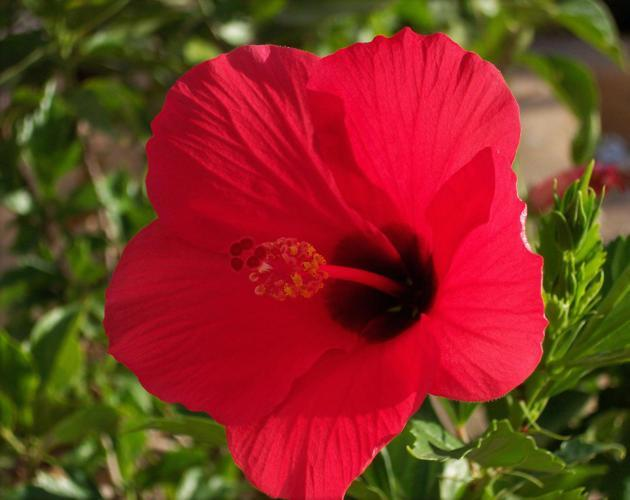

In [134]:
kimage.load_img(query_image)

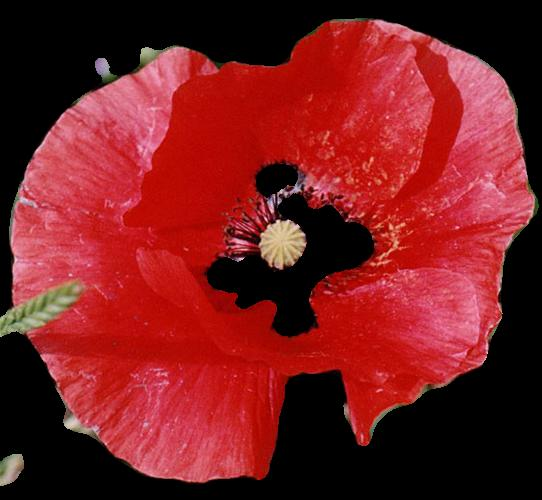

In [135]:
image_found = 'mask_train/{}'.format(list_images[ind[0][0]])
kimage.load_img(image_found)

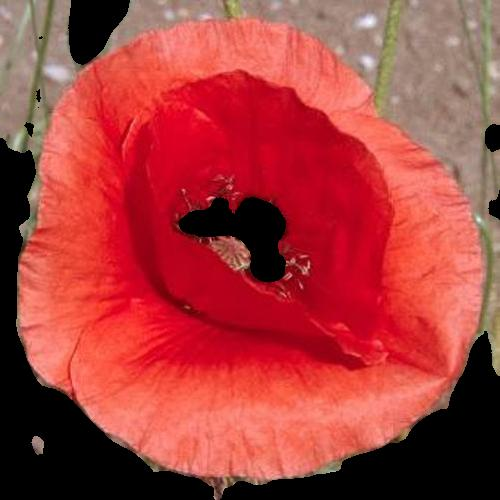

In [136]:
image_found = 'mask_train/{}'.format(list_images[ind[0][1]])
kimage.load_img(image_found)

In [542]:
edges

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

# Prove varie

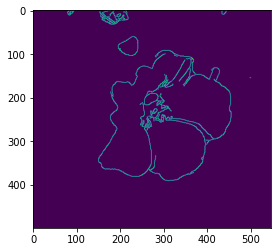

In [121]:
query_image = 'mask_test/image_00723.jpg'
image_canny = cv2.imread(query_image)
edges = cv2.Canny(image_canny, 500, 100)
plt.imshow(edges)

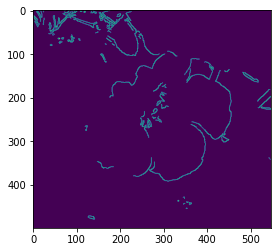

In [122]:
query_image = '102flowers/image_00723.jpg'
image_canny = cv2.imread(query_image)
edges = cv2.Canny(image_canny, 500, 300)
plt.imshow(edges)


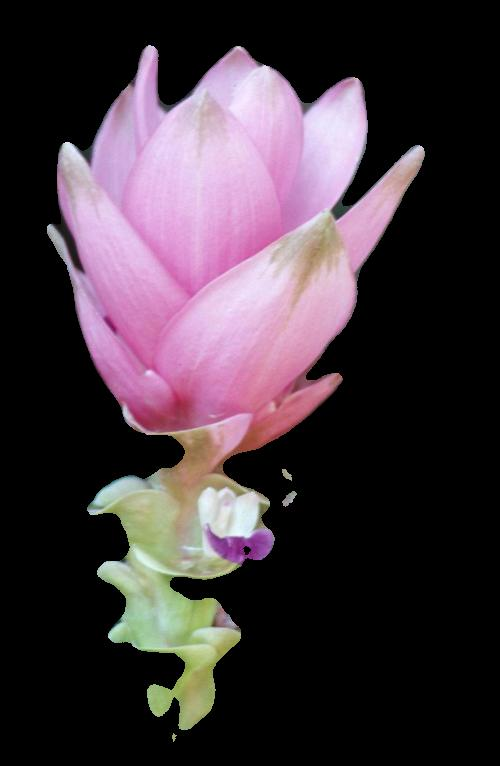

In [537]:
image_found = 'mask_train/{}'.format(list_images[ind[0][1]])
kimage.load_img(image_found)

In [603]:
print('Accuracy: ', accuracy_block2_pool_train)

Accuracy:  0.22254901960784312


In [435]:
with open ('102flowers_y_test.pickle', 'rb') as handle:
    y_test= pickle.load(handle)

num_classes = 102
yc_test = keras.utils.to_categorical(y_test-1, num_classes)

In [436]:

num_classes = 102
yc_test = keras.utils.to_categorical(y_test-1, num_classes)

In [437]:
yc_test=yc_test[:9]


In [39]:
x_features_test = load_data(feature_extractor=combo_colors_kps_neural, folder = 'mask_test/')

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [227]:
y_pred = classifier.predict(x_features_test)

In [229]:
y_pred = classifier.predict(features4)
confusion_matrix2_train = confusion_matrix(np.argmax(yc_train, axis=1),y_pred)
classification_report2_train = classification_report(np.argmax(yc_train, axis=1),y_pred)
classification_report_DICT_train = classification_report(np.argmax(yc_train, axis=1),y_pred, output_dict=True)
accuracy_block2_pool_train = classification_report_DICT_train['accuracy']

In [230]:
print('Accuracy: ', accuracy_block2_pool_train)

Accuracy:  1.0


# PROVA FINETUNING + COLORS

In [75]:
with open ('102flowers_y_test.pickle', 'rb') as handle:
    y_test= pickle.load(handle)

num_classes = 102
yc_test = keras.utils.to_categorical(y_test-1, num_classes)

In [81]:
np.argmax(yc_test[12])

76

In [78]:
import pickle
with open ('102flowers_y_train.pickle', 'rb') as handle:
    y_train = pickle.load(handle)
num_classes = 102
yc_train = keras.utils.to_categorical(y_train-1, num_classes)

In [86]:
with open('102flowers_y_val.pickle', 'rb') as handle:
    y_val = pickle.load(handle)
num_classes = 102
yc_val = keras.utils.to_categorical(y_val-1, num_classes)

In [16]:
from tensorflow.keras.applications import vgg16

In [170]:
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.applications import resnet_v2
from tensorflow.keras.applications import vgg16

In [51]:
from keras.layers import (Conv1D, MaxPool1D, Dropout, Flatten, Dense,
                          Input, concatenate)
from keras.models import Model, Sequential

In [52]:
# Dummy feature
def identity(image_path):
    img = kimage.load_img(image_path, target_size=(224, 224), color_mode= 'rgb')
    x = kimage.img_to_array(img)
    x = mobilenet_v2.preprocess_input(x)
    return x

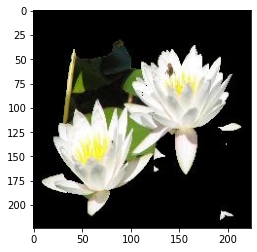

In [53]:
img = kimage.load_img('mask_NEW/image_00300.jpg', target_size=(224, 224), color_mode= 'rgb')
plt.imshow(img)

In [54]:
def load_data_NN(folder, feature_extractor=identity, maximages = 'default' ):
    if maximages == 'default':
        maximages = len(os.listdir(folder))+1

    base_path = folder

    features = []

    for index, image in enumerate(sorted(os.listdir(base_path))):
        print ('image', index)
        if index < maximages:
            image_path = base_path+image
            # Load file and extract features
            cur_features = feature_extractor(image_path)
            #cur_features = cur_features.flatten()
            features.append(cur_features)

    #features = np.array(features)
    return features

In [55]:
X_train = load_data_NN(folder = 'mask_NEW_train/')

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [56]:
X_train[0].shape

(224, 224, 3)

In [57]:
X_val = load_data_NN(folder = 'mask_NEW_val/')

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [58]:
X_test = load_data_NN(folder = 'mask_NEW_test/')

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [72]:
X_test[0].shape

(224, 224, 3)

x = base_net.output
colors = Input(shape=(3,), name='Features')
x = keras.layers.Dense(1024, activation = 'relu')(x)
merged = concatenate([x, colors])
x = keras.layers.Dense(576, activation = 'relu')(merged)
x = keras.layers.Dense(128, activation = 'relu')(merged)
x = keras.layers.Dropout(0.2)(x)
pred = keras.layers.Dense(102, activation='softmax')(x) #1 FN

In [ ]:
net = keras.Model(inputs=[base_net.input, colors], outputs=[pred])
net.summary()

with open ('train_colors.pickle', 'rb') as handle:
    train_colors= pickle.load(handle)
with open ('test_colors.pickle', 'rb') as handle:
    test_colors= pickle.load(handle)
with open ('val_colors.pickle', 'rb') as handle:
    val_colors= pickle.load(handle)

net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(),
            metrics=['accuracy'])

net.fit([np.asarray(X_train), np.asarray(train_colors)], yc_train, batch_size=64, epochs=30, verbose=1, validation_data=([np.asarray(X_val),np.asarray(val_colors)], yc_val))

net.save('net_3.h5')

In [272]:
train_processing = keras.preprocessing.image.ImageDataGenerator(rotation_range=45, 
                                                                width_shift_range=0.1, 
                                                                height_shift_range=0.1, 
                                                                zoom_range=0.1, 
                                                                preprocessing_function=mobilenet_v2.preprocess_input)###resnet_v2 mobilenet_v2 vgg16
train_generator= train_processing.flow_from_directory( 
    directory='mask_NEW_test_folders',
    target_size=(224,224), #scelta standard
    color_mode= 'rgb', #dobbiamo mettere stessi parametri della rete di partenza
    class_mode = 'categorical',
    batch_size = 16,
    shuffle = True,
    seed = 1
)

Found 6149 images belonging to 102 classes.


In [273]:
test_processing = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=mobilenet_v2.preprocess_input)###resnet_v2 mobilenet_v2 vgg16
test_generator= test_processing.flow_from_directory(
    directory='mask_NEW_train_folders',
    target_size=(224,224), #scelta standard
    color_mode= 'rgb', #dobbiamo mettere stessi parametri della rete di partenza
    class_mode = 'categorical',
    batch_size = 16,
    shuffle = True,
    seed = 1
)

Found 1020 images belonging to 102 classes.


In [287]:
base_net = mobilenet_v2.MobileNetV2(input_shape=(224,224,3), weights ='imagenet', include_top=False, pooling='avg')

In [163]:
base_net = resnet_v2.ResNet101V2(input_shape=(224,224,3), weights ='imagenet', include_top=False, pooling='avg')

171319296/171317808 [==============================] - 171s 1us/step


In [254]:
base_net = vgg16.VGG16(input_shape=(224,224,3), weights ='imagenet', include_top=False, pooling='avg')

In [288]:
for layers in base_net.layers:
    layers.trainable = False

In [276]:
base_net.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_29[0][0]                   
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [279]:
x = base_net.output
#colors = Input(shape=(3,), name='Features')
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.BatchNormalization()(x)
#merged = concatenate([x, colors])
x = keras.layers.ReLU()(x) ##
x = keras.layers.Dense(576, activation = 'relu', kernel_regularizer=regularizers.l2(0.0005))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.0005))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)
#x = keras.layers.BatchNormalization()(x)#
pred = keras.layers.Dense(102, activation='softmax')(x) 

In [282]:
net = keras.Model(inputs=base_net.input, outputs=pred)

In [283]:
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(), #keras.optimizers.RMSprop() #keras.optimizers.Adam() #sgd
            metrics=['accuracy'])
history = net.fit(train_generator, batch_size=64, epochs=30, verbose=1, validation_data=test_generator) ####30

Epoch 1/30
385/385 [==============================] - 192s 487ms/step - loss: 4.1772 - accuracy: 0.2380 - val_loss: 2.4817 - val_accuracy: 0.5235
Epoch 2/30
385/385 [==============================] - 184s 476ms/step - loss: 2.3483 - accuracy: 0.5473 - val_loss: 1.9404 - val_accuracy: 0.6510
Epoch 3/30
385/385 [==============================] - 180s 467ms/step - loss: 1.9894 - accuracy: 0.6454 - val_loss: 1.7851 - val_accuracy: 0.6902
Epoch 4/30
140/385 [=========>....................] - ETA: 1:48 - loss: 1.7498 - accuracy: 0.7097

KeyboardInterrupt: 

In [159]:
net.save('mod2_mobilenet.h5')

In [289]:
x = base_net.output
#colors = Input(shape=(3,), name='Features')
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.0005))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)
#x = keras.layers.BatchNormalization()(x)#
pred = keras.layers.Dense(102, activation='softmax')(x) 

net = keras.Model(inputs=base_net.input, outputs=pred)


net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(), #keras.optimizers.RMSprop() #keras.optimizers.Adam() #sgd
            metrics=['accuracy'])

history = net.fit(train_generator, batch_size=64, epochs=100, verbose=1, validation_data=test_generator) ####30

Epoch 1/100
385/385 [==============================] - 190s 484ms/step - loss: 3.9341 - accuracy: 0.2068 - val_loss: 2.0674 - val_accuracy: 0.5186
Epoch 2/100
385/385 [==============================] - 177s 460ms/step - loss: 1.9235 - accuracy: 0.5626 - val_loss: 1.5281 - val_accuracy: 0.6510
Epoch 3/100
385/385 [==============================] - 177s 460ms/step - loss: 1.4700 - accuracy: 0.6543 - val_loss: 1.2930 - val_accuracy: 0.6961
Epoch 4/100
385/385 [==============================] - 177s 459ms/step - loss: 1.2142 - accuracy: 0.7254 - val_loss: 1.1264 - val_accuracy: 0.7539
Epoch 5/100
385/385 [==============================] - 177s 459ms/step - loss: 1.1181 - accuracy: 0.7399 - val_loss: 1.0721 - val_accuracy: 0.7608
Epoch 6/100
385/385 [==============================] - 177s 458ms/step - loss: 1.0220 - accuracy: 0.7607 - val_loss: 1.0327 - val_accuracy: 0.7804
Epoch 7/100
385/385 [==============================] - 177s 458ms/step - loss: 0.9660 - accuracy: 0.7786 - val_loss: 0

In [290]:
net.save('mod3_100epochs_mobilenet.h5')

In [144]:
x = base_net.output
#colors = Input(shape=(3,), name='Features')
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.BatchNormalization()(x)
#merged = concatenate([x, colors])
x = keras.layers.ReLU()(x) ##
x = keras.layers.Dense(576, activation = 'relu', kernel_regularizer=regularizers.l2(0.05))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.05))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)#
pred = keras.layers.Dense(102, activation='softmax')(x) 



net = keras.Model(inputs=base_net.input, outputs=pred)


net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(), #keras.optimizers.RMSprop()
            metrics=['accuracy'])
history = net.fit(np.asarray(X_train), yc_train, batch_size=64, epochs=30, verbose=1, validation_data=(np.asarray(X_val), yc_val)) ####30

Epoch 1/30
16/16 [==============================] - 48s 3s/step - loss: 51.0421 - accuracy: 0.0359 - val_loss: 39.3262 - val_accuracy: 0.1314
Epoch 2/30
16/16 [==============================] - 43s 3s/step - loss: 35.1061 - accuracy: 0.3656 - val_loss: 27.4252 - val_accuracy: 0.2941
Epoch 3/30
16/16 [==============================] - 43s 3s/step - loss: 23.3380 - accuracy: 0.6391 - val_loss: 19.0765 - val_accuracy: 0.4559
Epoch 4/30
16/16 [==============================] - 43s 3s/step - loss: 15.1004 - accuracy: 0.8379 - val_loss: 13.6953 - val_accuracy: 0.4657
Epoch 5/30
16/16 [==============================] - 43s 3s/step - loss: 9.9189 - accuracy: 0.9086 - val_loss: 10.4133 - val_accuracy: 0.4716
Epoch 6/30
16/16 [==============================] - 43s 3s/step - loss: 6.7331 - accuracy: 0.9634 - val_loss: 8.4032 - val_accuracy: 0.4725
Epoch 7/30
16/16 [==============================] - 43s 3s/step - loss: 4.8607 - accuracy: 0.9658 - val_loss: 7.2070 - val_accuracy: 0.4931
Epoch 8/30


In [145]:
net.save('mod2.h5')

In [ ]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

In [66]:
from keras.layers import (Conv1D, MaxPool1D, Dropout, Flatten, Dense,
                          Input, concatenate)
from keras.models import Model, Sequential
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [74]:
X_train_arr = np.asarray(X_train)
X_test_arr = np.asarray(X_test)
X_val_arr = np.asarray(X_val)

In [75]:
X_train_arr_norm = X_train_arr.astype('float32') / 255
X_test_arr_norm = X_test_arr.astype('float32') / 255
X_val_arr_norm = X_val_arr.astype('float32') / 255

In [64]:
input_shape = (224,224,3)

In [106]:
model = keras.Sequential(
    [
      keras.Input(shape=input_shape),
     layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
     layers.MaxPooling2D(pool_size=(2,2)), #non possiamo dire lo stride
     layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
     layers.MaxPooling2D(pool_size=(2,2)),
     layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
     layers.MaxPooling2D(pool_size=(2,2)),
     layers.Flatten(),
     layers.Dropout(0.2),
     layers.Dense(102, activation='softmax')
    ]
)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 52, 52, 16)        4624      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 10816)            

In [107]:
batch_size = 64
epochs =30
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

network = model.fit(X_test_arr_norm, yc_test, batch_size=batch_size, epochs=epochs, validation_data=(X_train_arr_norm, yc_train))

Epoch 1/30
97/97 [==============================] - 258s 3s/step - loss: 4.6187 - accuracy: 0.0176 - val_loss: 4.6530 - val_accuracy: 0.0098
Epoch 2/30
97/97 [==============================] - 260s 3s/step - loss: 4.4663 - accuracy: 0.0413 - val_loss: 4.8080 - val_accuracy: 0.0098
Epoch 3/30
97/97 [==============================] - 258s 3s/step - loss: 4.4153 - accuracy: 0.0351 - val_loss: 4.7965 - val_accuracy: 0.0098
Epoch 4/30
97/97 [==============================] - 257s 3s/step - loss: 4.4198 - accuracy: 0.0315 - val_loss: 4.7867 - val_accuracy: 0.0088
Epoch 5/30
97/97 [==============================] - 258s 3s/step - loss: 4.4247 - accuracy: 0.0379 - val_loss: 4.7787 - val_accuracy: 0.0098
Epoch 6/30
97/97 [==============================] - 257s 3s/step - loss: 4.4278 - accuracy: 0.0303 - val_loss: 4.7978 - val_accuracy: 0.0098
Epoch 7/30
13/97 [===>..........................] - ETA: 3:41 - loss: 4.4355 - accuracy: 0.0417

KeyboardInterrupt: 

In [ ]:
model.save('model_nocol_custom.h5')

In [ ]:
epochs = 30
x_plot = list(range(1,epochs+1))
plot_history(network)

In [ ]:
net.evaluate(X_test)

In [208]:
train_colors = load_data(feature_extractor=get_colors, folder = 'mask_NEW_train/')

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [209]:
with open('train_colors.pickle', 'wb') as handle:
    pickle.dump(train_colors, handle)

In [210]:
test_colors = load_data(feature_extractor=get_colors, folder = 'mask_NEW_test/')
with open('test_colors.pickle', 'wb') as handle:
    pickle.dump(test_colors, handle)

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [211]:
val_colors = load_data(feature_extractor=get_colors, folder = 'mask_NEW_val/')
with open('val_colors.pickle', 'wb') as handle:
    pickle.dump(val_colors, handle)

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [28]:
get_colors('102flowers/image_00723.jpg')

array([ 1.0825062, 52.923447 , 45.994045 ], dtype=float32)

In [213]:
get_colors('102flowers/image_00723.jpg')


array([ 1.0825062, 52.923447 , 45.994045 ], dtype=float32)

In [214]:
get_colors('mask_NEW_test/image_00723.jpg')

array([1.5076135e-02, 4.7208401e+01, 5.2776520e+01], dtype=float32)

In [215]:
get_colors('mask_test/image_00723.jpg')

array([ 0.7693249, 47.04946  , 52.18121  ], dtype=float32)

# PROVA DATA AUGMENTATION

In [1]:
def identity_plain(image_path):
    img = kimage.load_img(image_path, target_size=(224, 224), color_mode= 'rgb')
    x = kimage.img_to_array(img)
    #x = mobilenet_v2.preprocess_input(x)
    return x

In [15]:
def load_data(folder, feature_extractor=identity_plain, maximages = 'default' ):
    if maximages == 'default':
        maximages = len(os.listdir(folder))+1

    base_path = folder

    features = []

    for index, image in enumerate(sorted(os.listdir(base_path))):
        print ('image', index)
        if index < maximages:
            image_path = base_path+image
            # Load file and extract features
            cur_features = feature_extractor(image_path)
 np.asarray(cur_features = cur_features.flatten()
            features.append(cur_features)

    #features = np.array(features)
    return features

In [16]:
X_train = load_data(folder = 'mask_NEW_train/')

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [18]:
np.asarray(X_train).shape

(1020, 224, 224, 3)

In [27]:
datagen = keras.preprocessing.image.ImageDataGenerator(width_shift_range=[-200,200])

In [28]:

# create iterator
it = datagen.flow(np.asarray(X_train), yc_train)

In [37]:
batch = it.next()
batch[0].shape

(32, 224, 224, 3)

In [34]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

TypeError: Invalid shape (32, 224, 224, 3) for image data